In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
from datetime import date
import random

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200

# Enter your location and file name:

In [3]:
file_name = 'dqt_interview_task_1_data.csv'

In [4]:
df = pd.read_csv(file_name)

# Task 1a

In [5]:
users = sorted(list(df['User'].unique()))

df0 = df[['User', 'File SHA1']].drop_duplicates()
df1 = df[['User', 'File SHA1']]

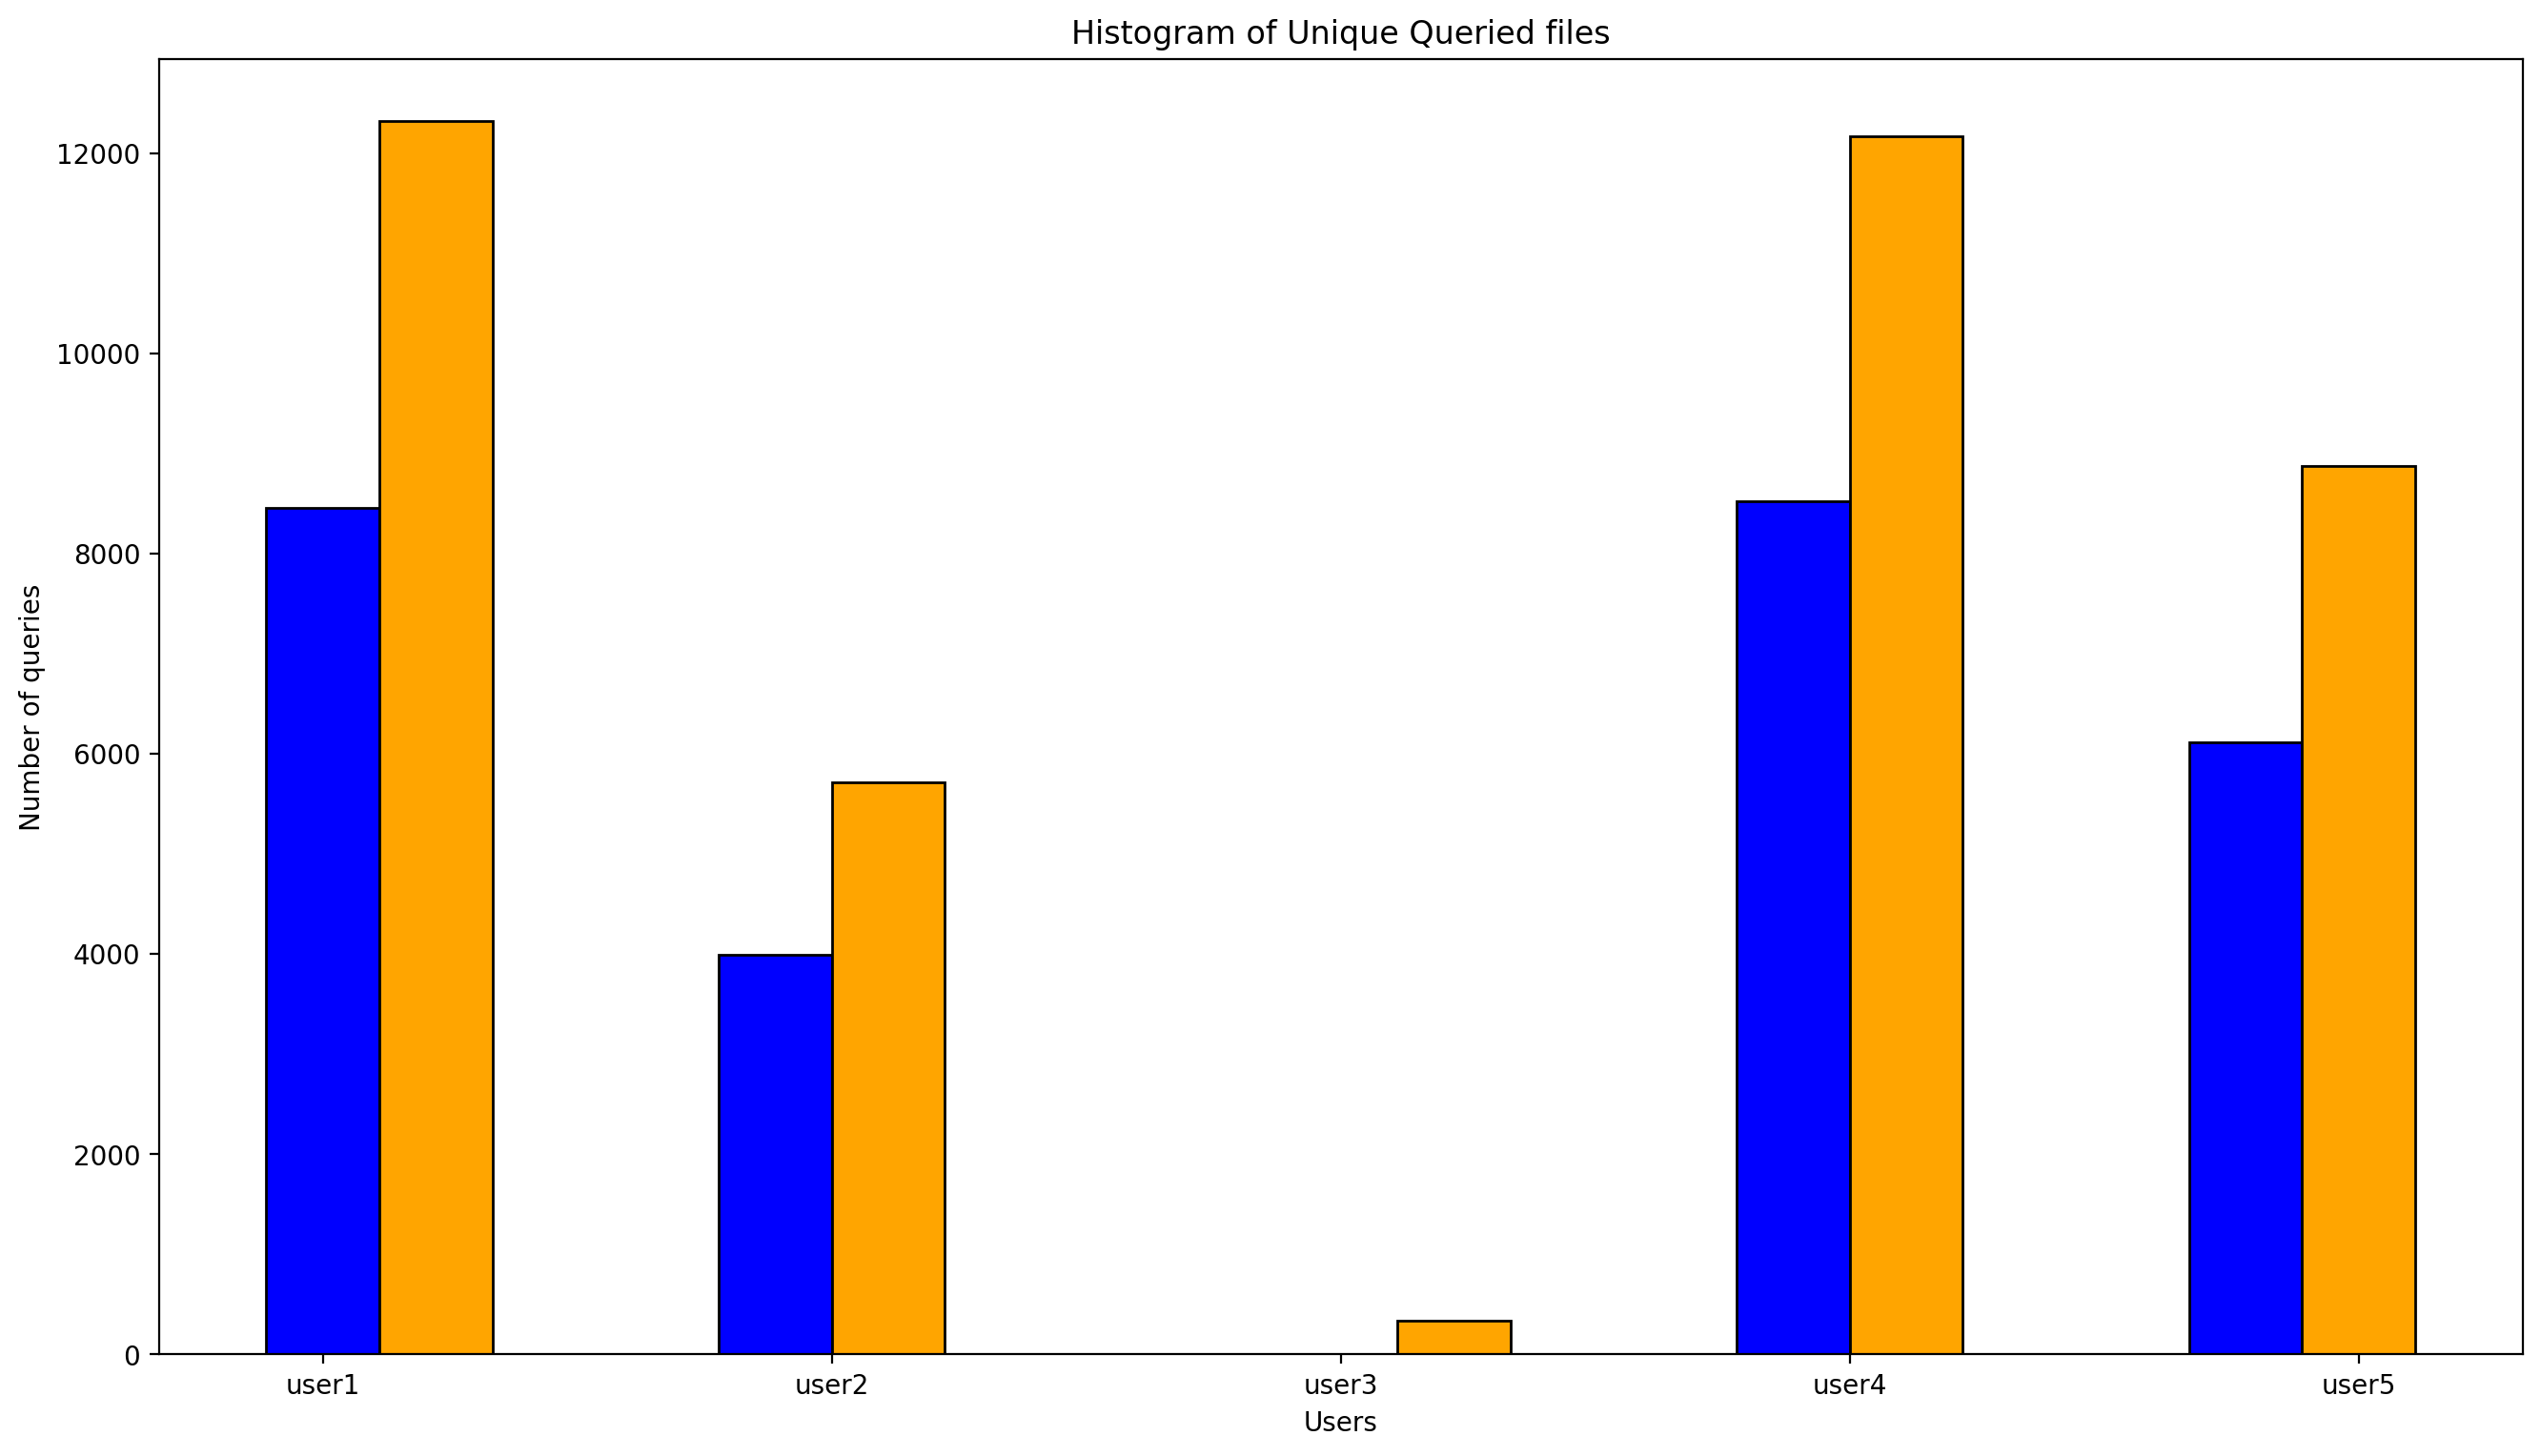

In [6]:
plt.hist(df0['User'].sort_values(), color = 'blue', edgecolor = 'black',
         bins = int(90/5), align='left')

plt.title('Histogram of Queried files')
plt.xlabel('file SHA1')
plt.ylabel('Number of queries')

plt.hist(df1['User'].sort_values(), color = 'orange', edgecolor = 'black',
         bins = int(90/5), align='right')

plt.title('Histogram of Unique Queried files')
plt.xlabel('Users')
plt.ylabel('Number of queries')

plt.show()

Text(0, 0.5, 'Percentage of uniques')

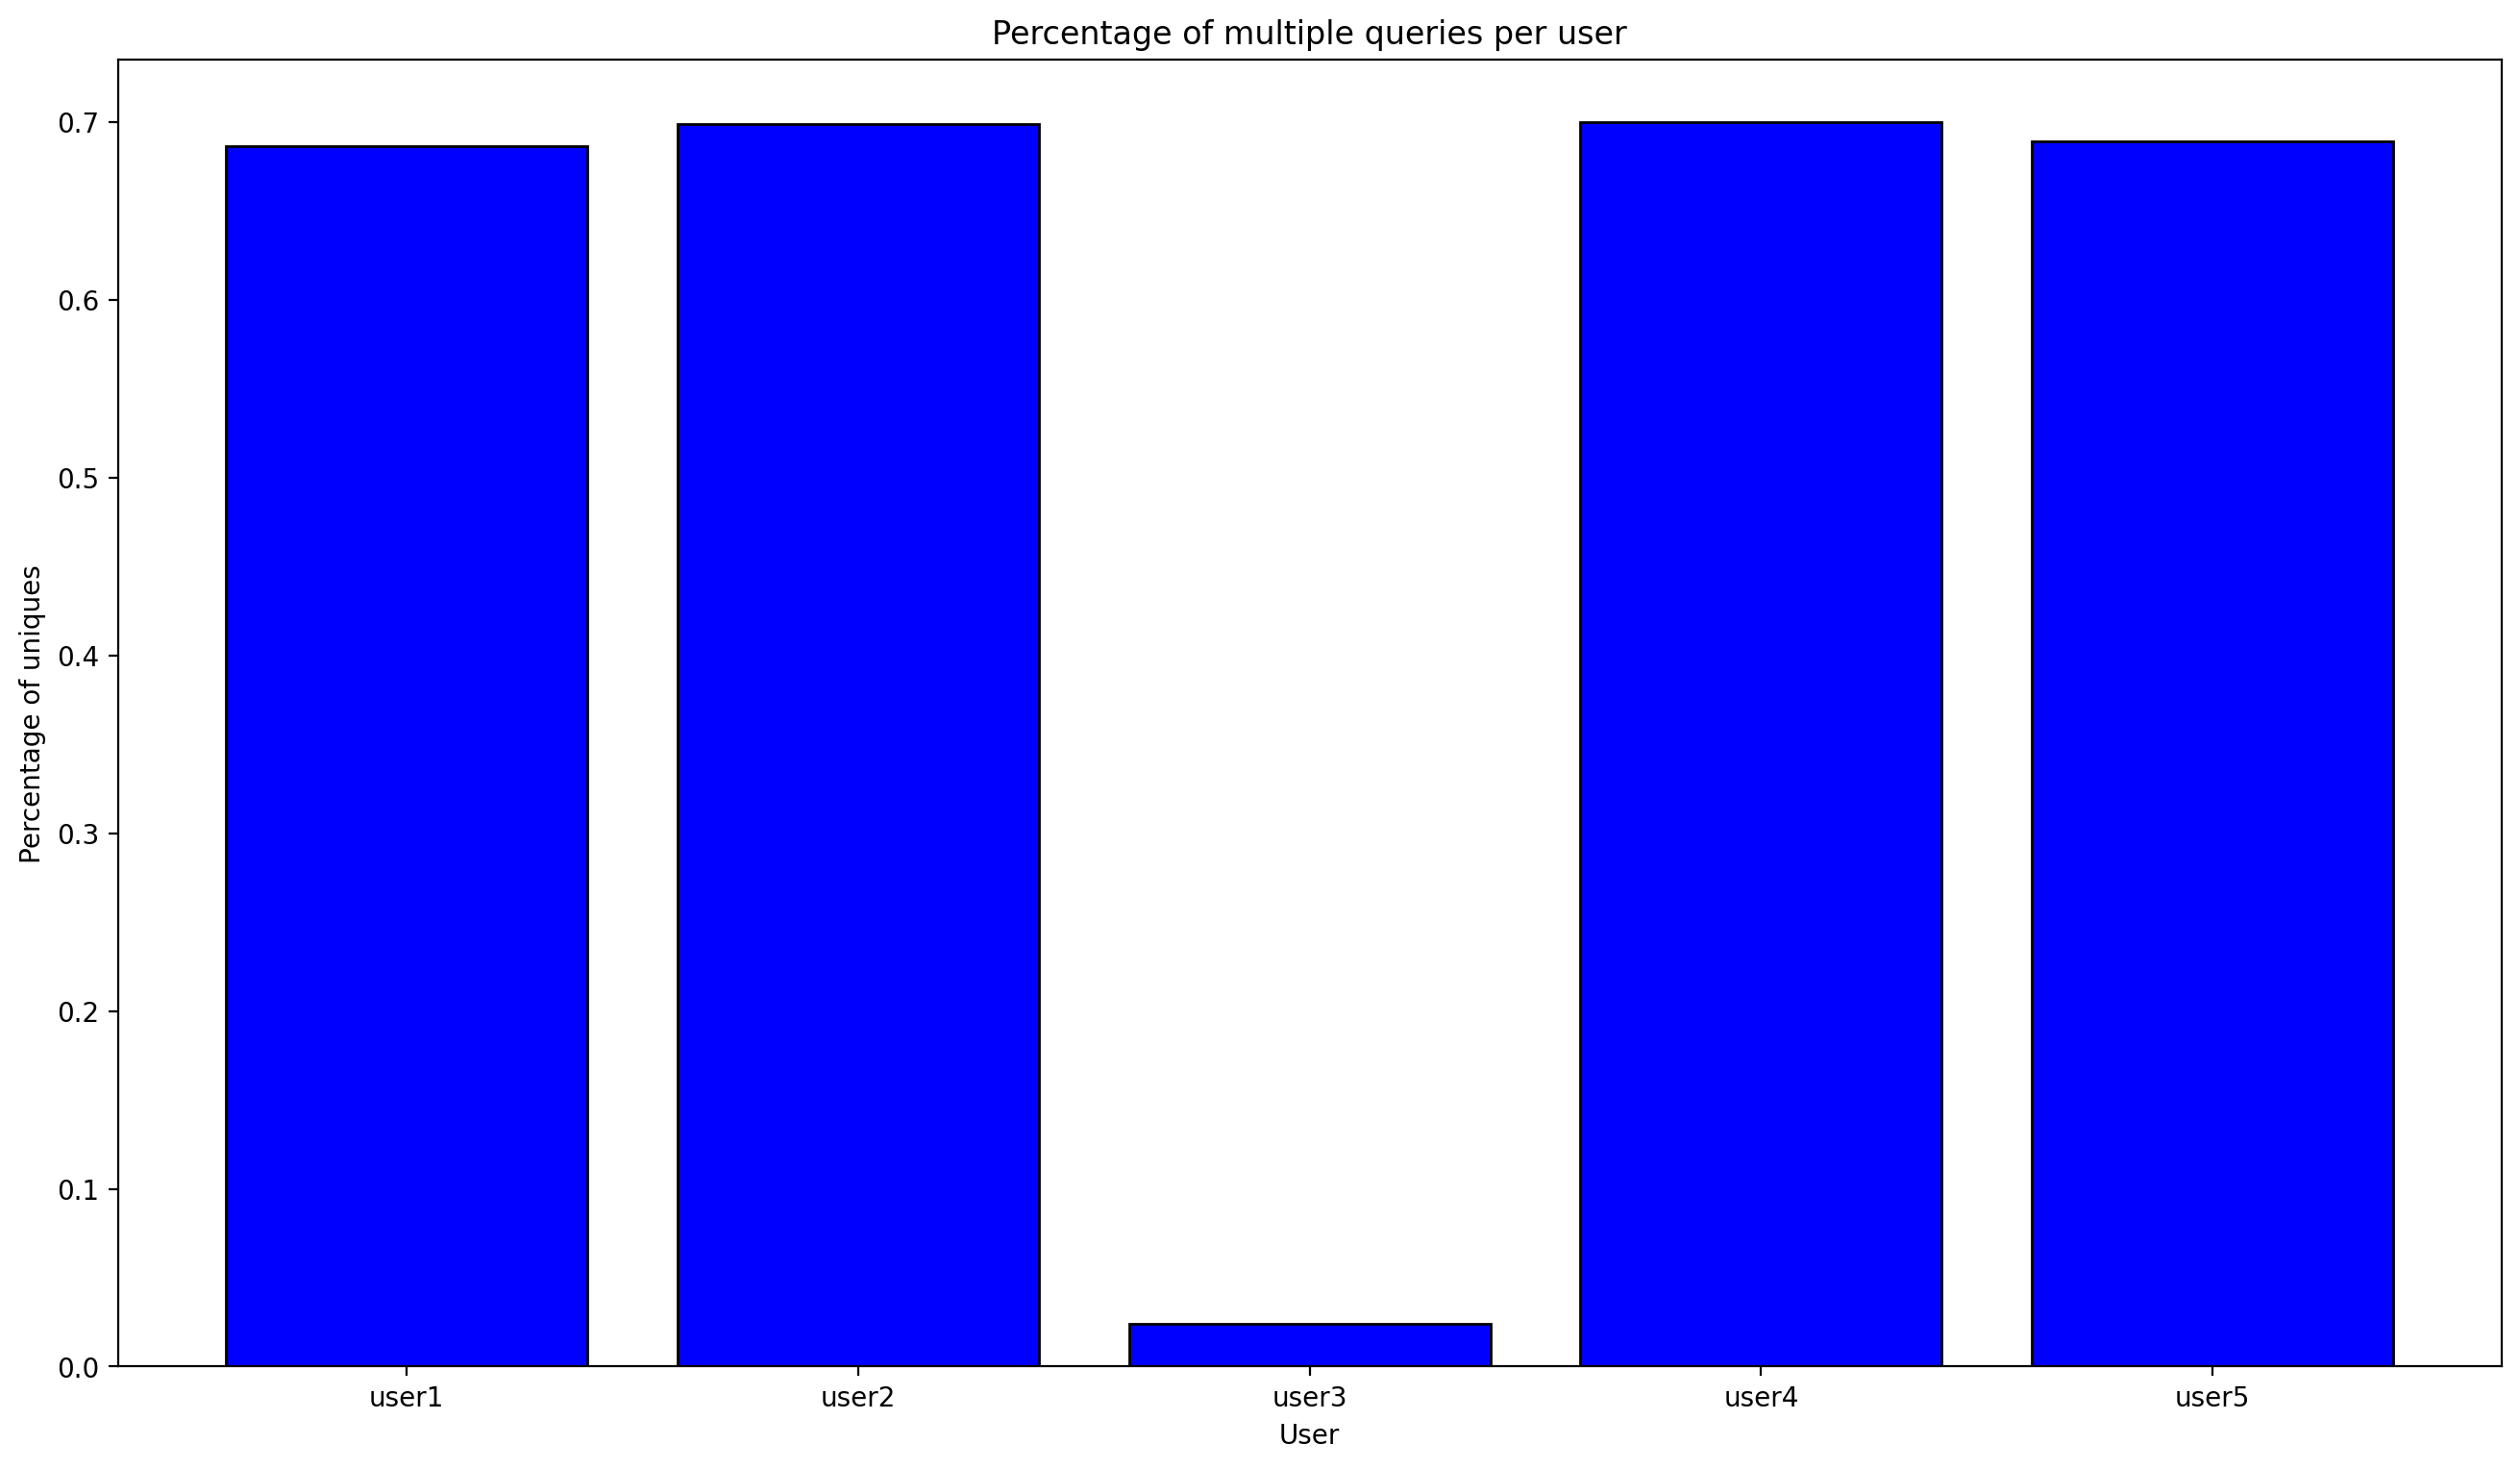

In [7]:
##TASK 1aa

df0 = df[['User', 'File SHA1']].drop_duplicates()
df1 = df[['User', 'File SHA1']]

user_d0 = df0.groupby('User').count()
user_d1 = df1.groupby('User').count()

user_df = pd.merge(user_d1, user_d0,
              on=['User'], 
              how='inner', indicator='Exist')


user_df["percentage"] = user_df["File SHA1_y"]/user_df["File SHA1_x"]
user_df = user_df.reset_index()
plt.bar(user_df['User'].sort_values(), user_df['percentage'], color = 'blue', edgecolor = 'black')

plt.title('Percentage of multiple queries per user')
plt.xlabel('User')
plt.ylabel('Percentage of uniques')

# Task 1b

In [8]:
min_date = df['Queried At'].min().split(" ")[0].split("-")
start = date(int(min_date[0]), int(min_date[1]), int(min_date[2]))

def datetime_to_days_past(timedate):
    date_str = timedate.split(" ")[0]
    date_lst = date_str.split("-")
    final = date(int(date_lst[0]), int(date_lst[1]), int(date_lst[2])) 
    
    return (final-start).days


df['Q_date'] = df['Queried At'].apply(datetime_to_days_past)

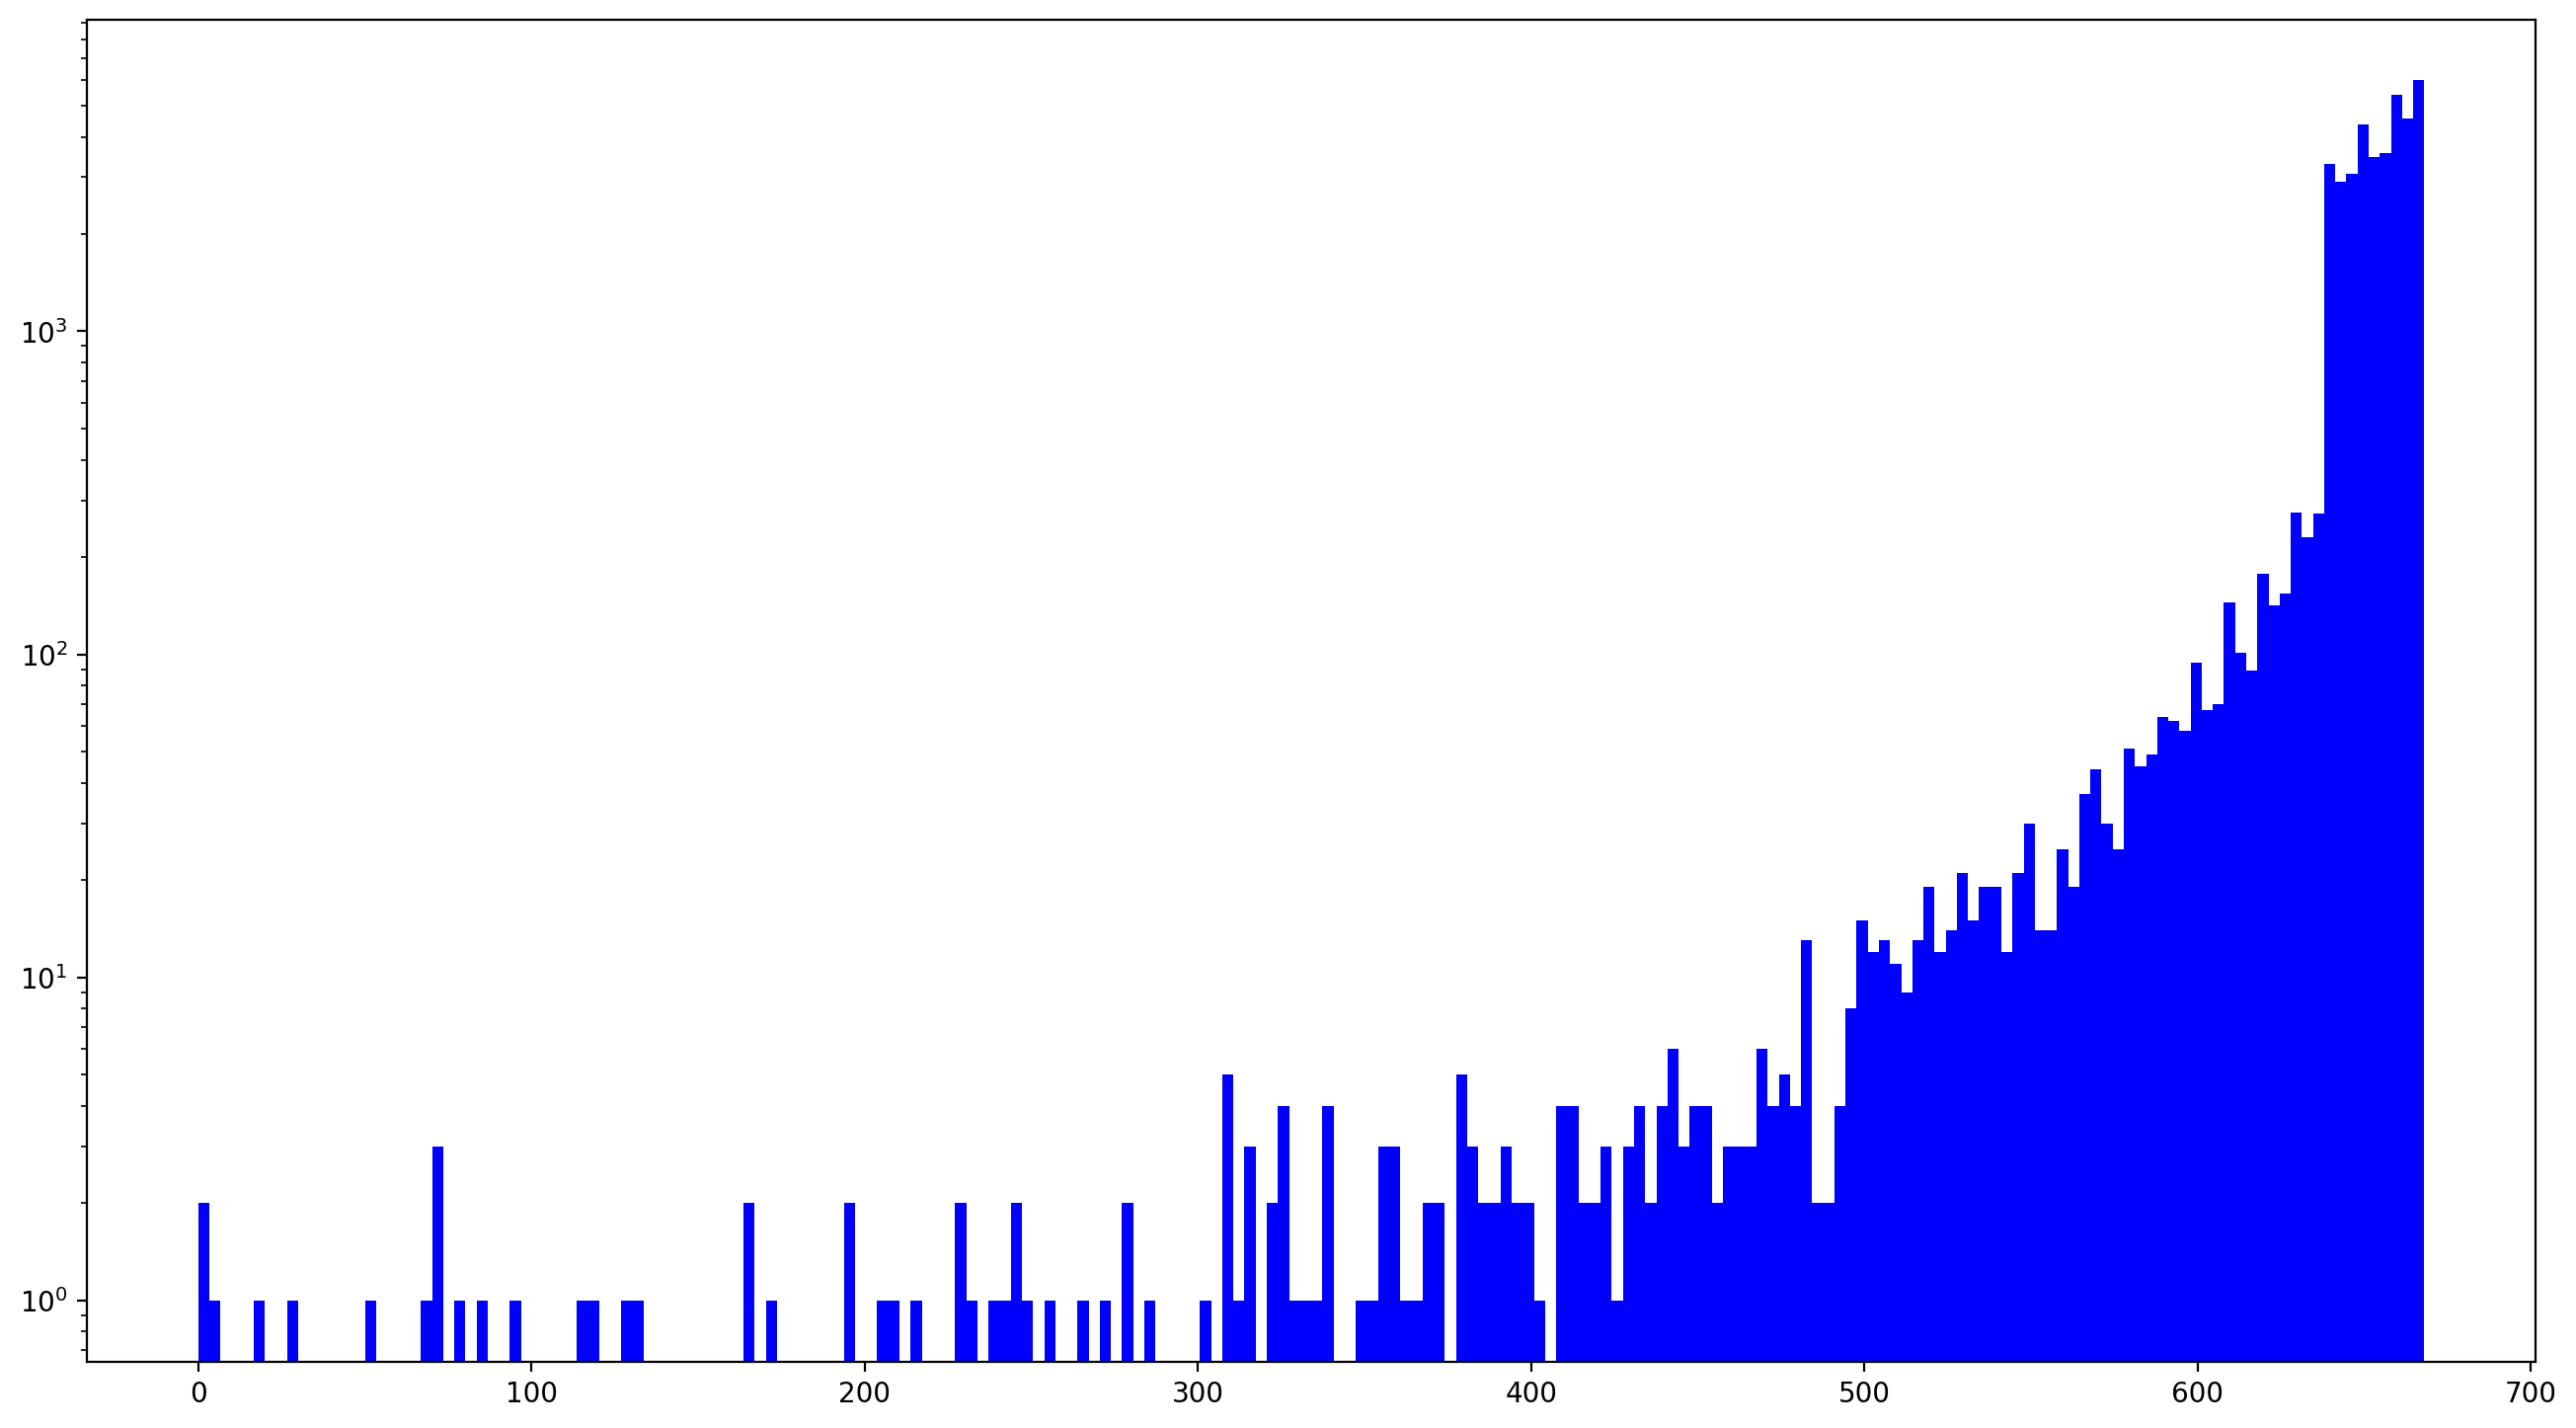

In [9]:
plt.hist(df['Q_date'], color = 'blue', bins=200, log=True)
plt.show()

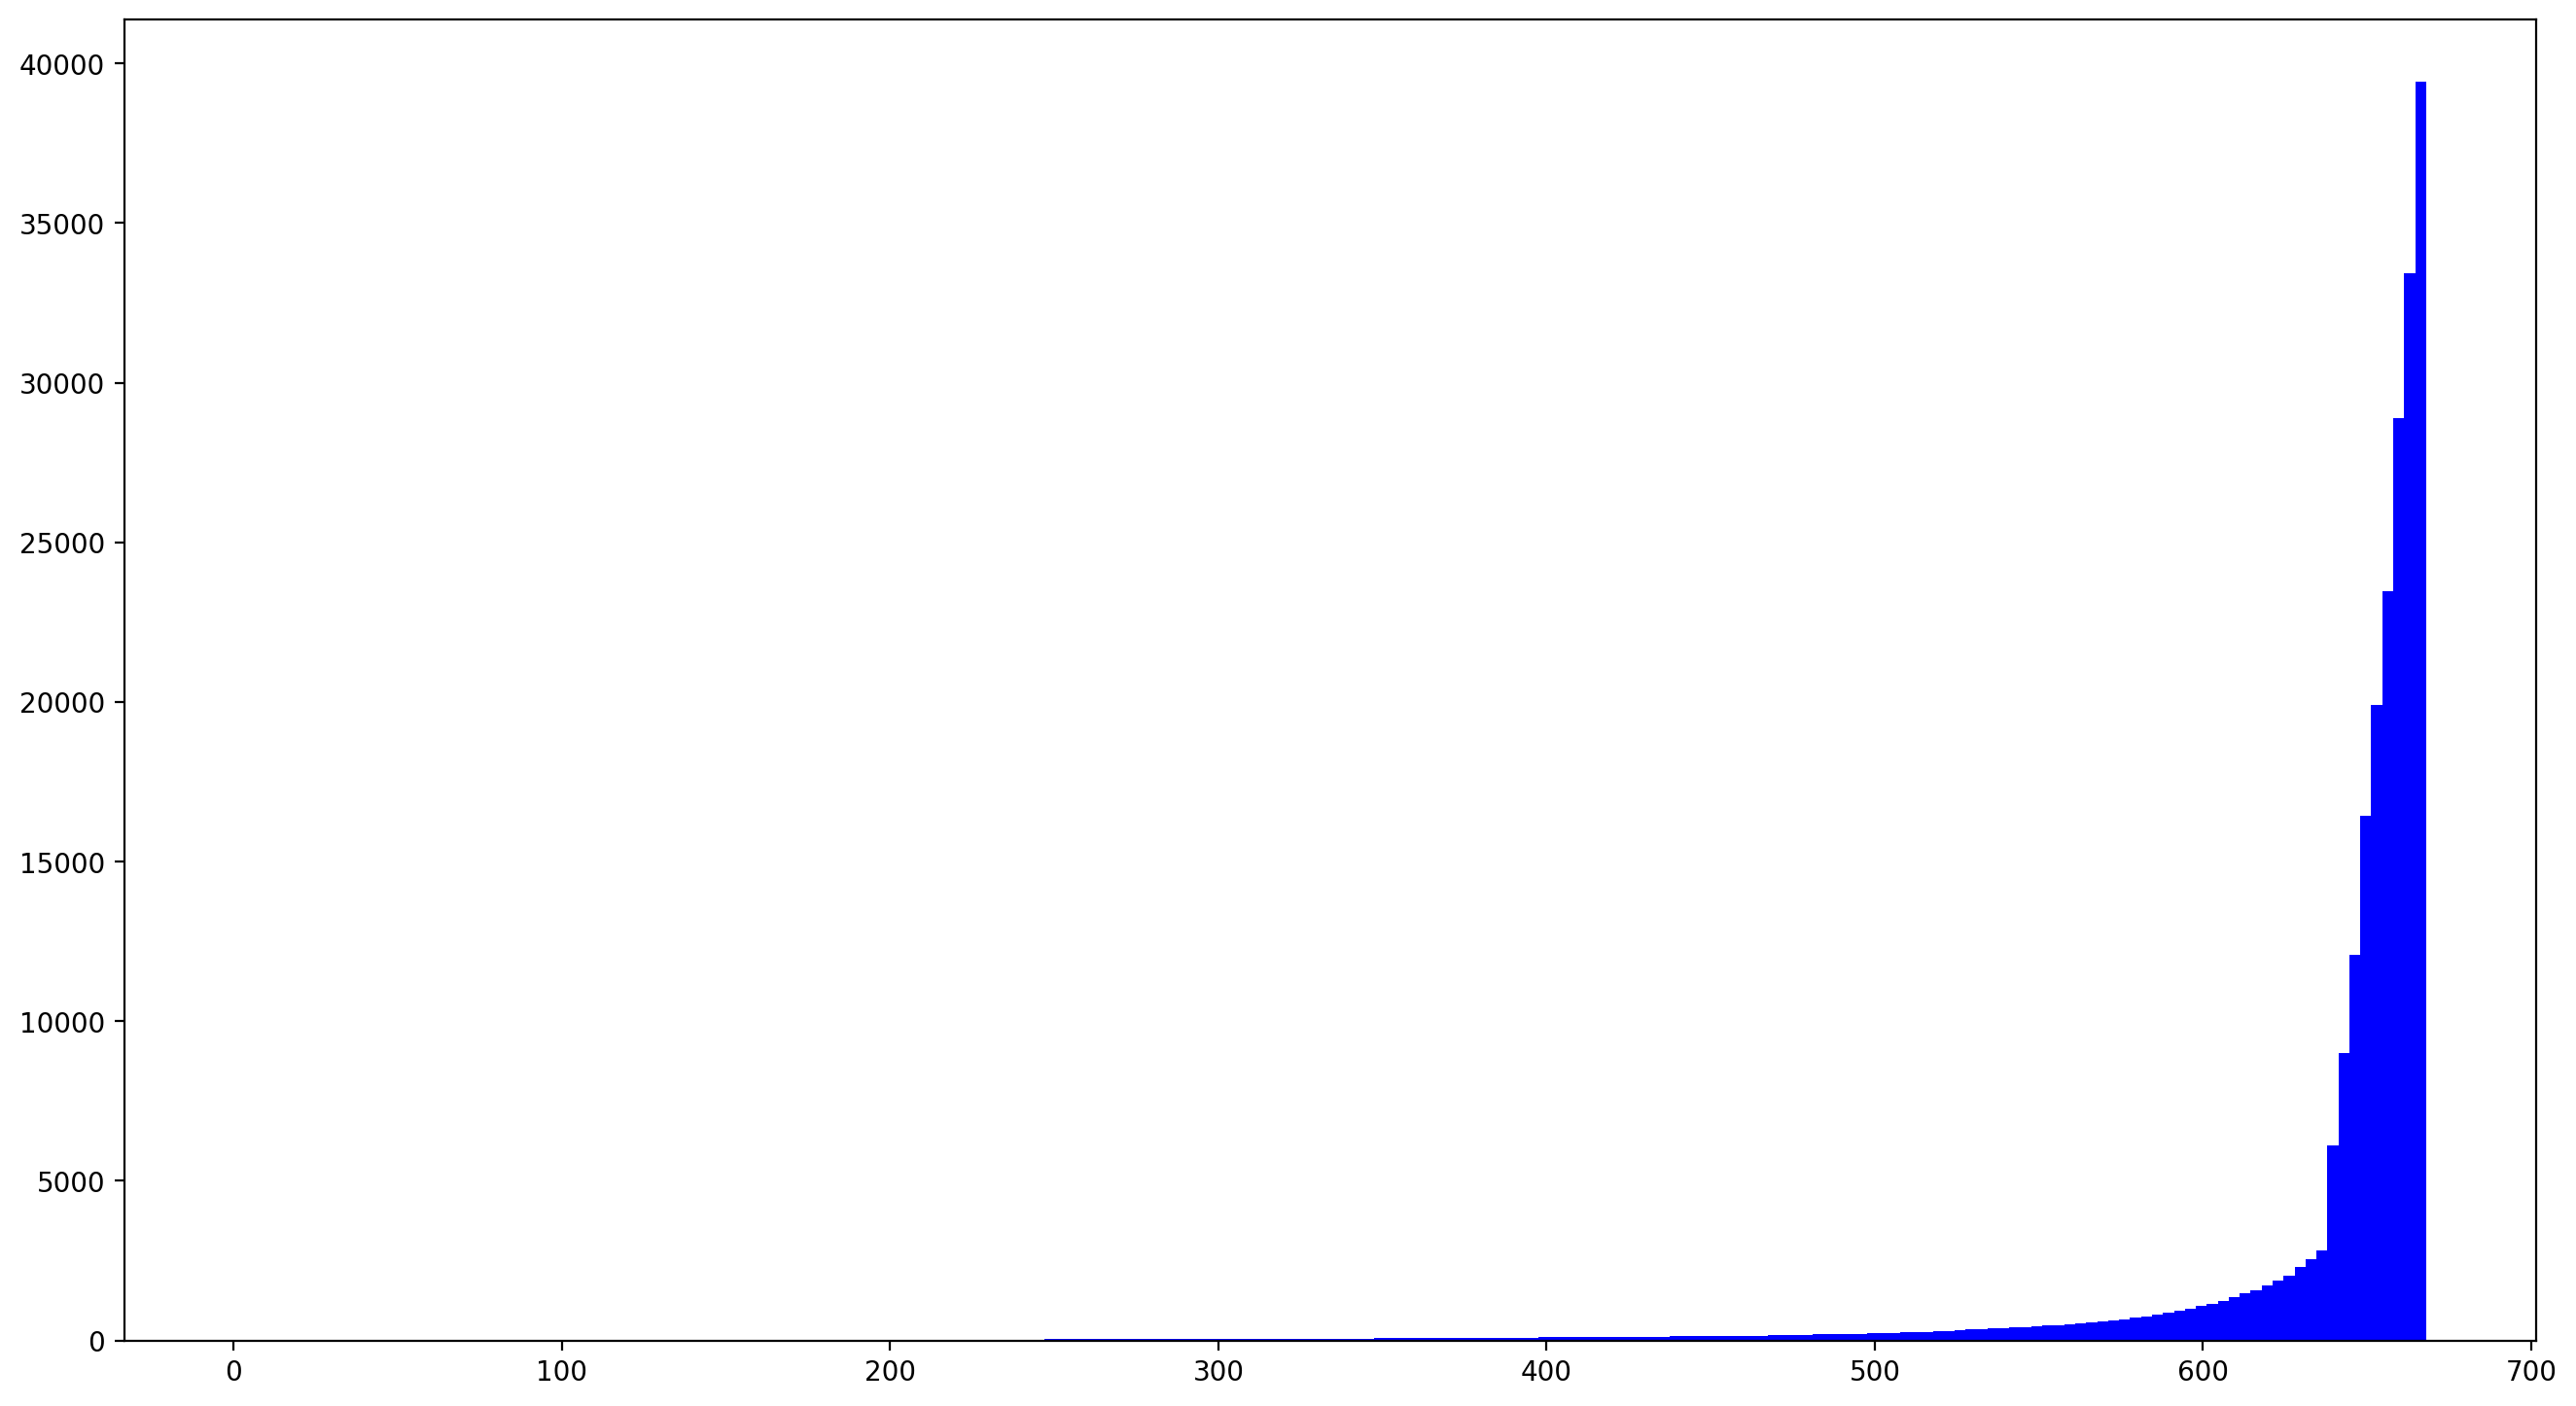

In [10]:
plt.hist(df['Q_date'], color = 'blue', bins=200, cumulative=True)
plt.show()

### Choose File Age Range as described below

### 1 = 0-360 dana - gdje je step: 30 dana
### 2 = 0-52*7 dana - gdje je step: 7 dana
### 3 = 0-365 dana - gdje je step: 1 dan
### 4 = 0-30 dana - gdje je step: 1 dan
### 5 = 0-100 dana - gdje je step: 1 dan
### 6 = 0-7 dana - gdje je step: 1 dan

In [11]:
age_range = 5

In [12]:
end = df['Q_date'].max()


if age_range == 1:
    #0-360 dana - gdje je step: 30 dana
    start = end - 12*30
    step = 30

elif age_range == 2:
    #0-52*7 dana - gdje je step: 7 dana
    start = end - 52*7
    step = 7

elif age_range == 3:
    #0-365 dana - gdje je step: 1 dan
    start = end - 365
    step = 1
    
elif age_range == 4:
    #0-30 dana - gdje je step: 1 dan
    start = end - 30
    step = 1

elif age_range == 5:
    #0-100 dana - gdje je step: 1 dan
    start = end - 100
    step = 1

else:
    #0-7 dana - gdje je step: 1 dan
    start = end - 7
    step = 1

def assign_time_groups(v):
    result = None
    for i in range((end-start)//step):
        if v >= i*step+start:
            result = i
        else:
            break
    return result

df['age_bracket'] = df['Q_date'].apply(assign_time_groups)

Text(0, 0.5, 'Number of queries')

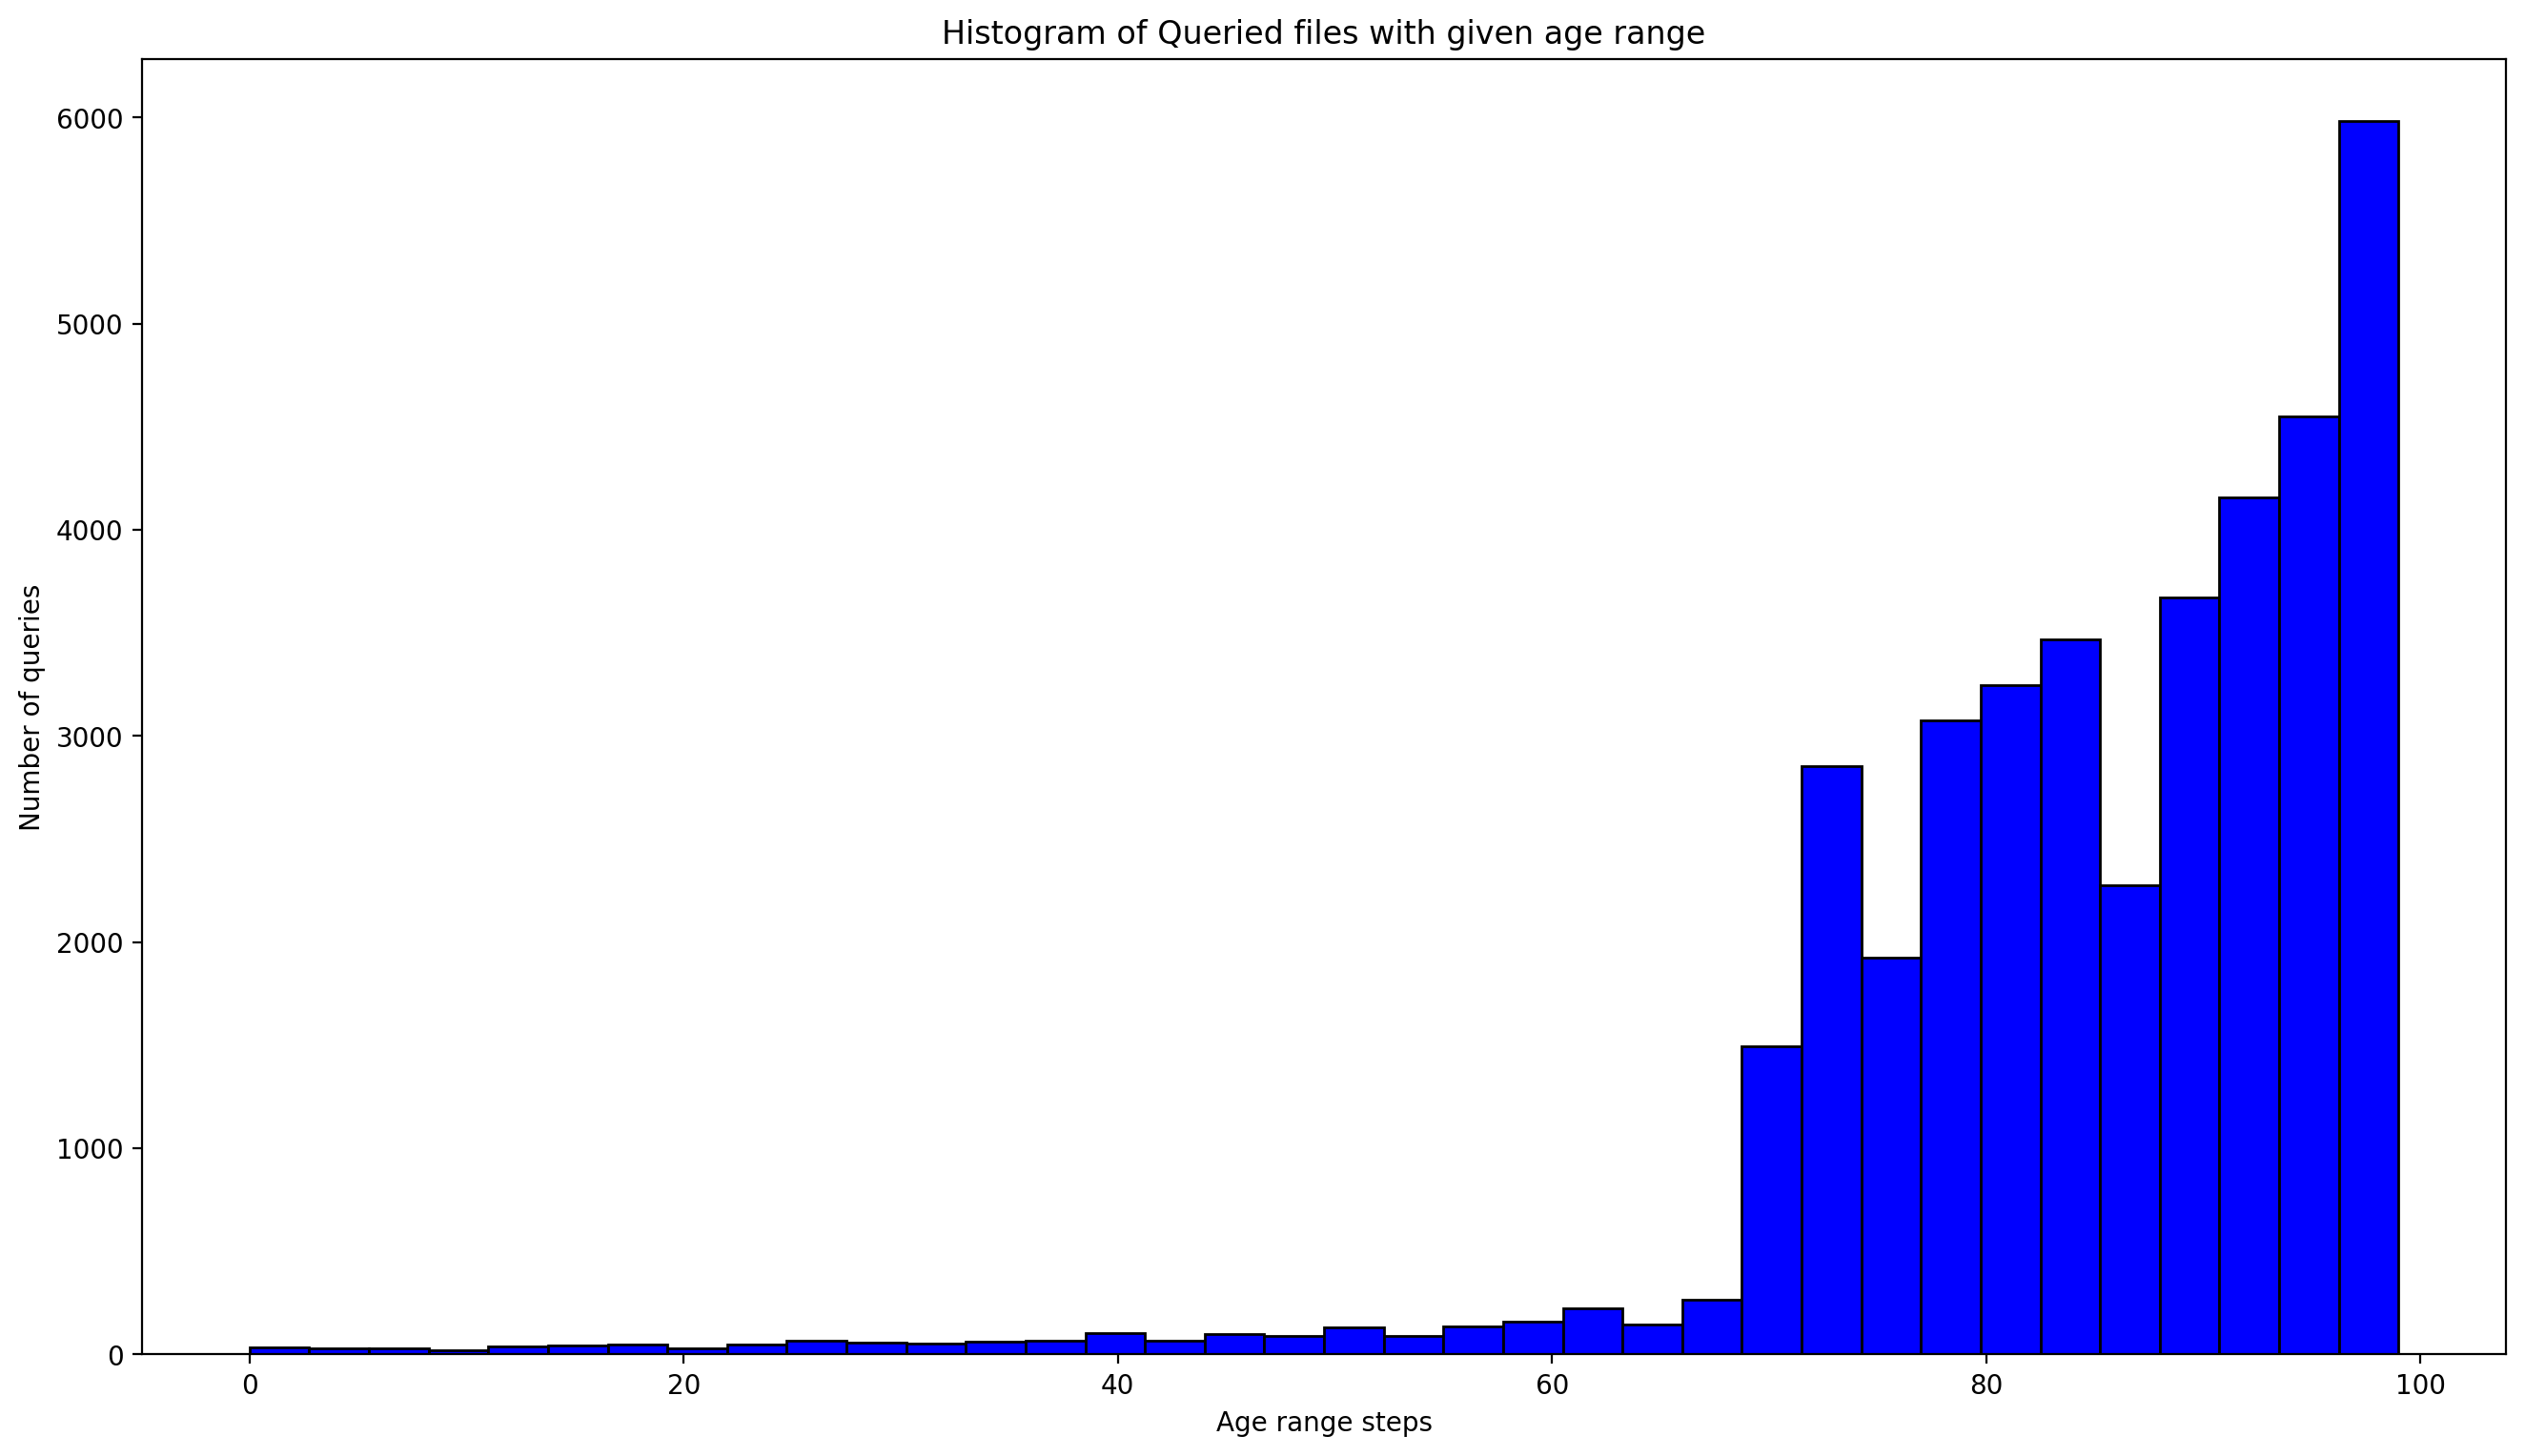

In [13]:
#df1 = data_task[['User', 'Queried At']].drop_duplicates()

plt.hist(df['age_bracket'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

plt.title('Histogram of Queried files with given age range')
plt.xlabel('Age range steps')
plt.ylabel('Number of queries')

Text(0, 0.5, 'Number of queries')

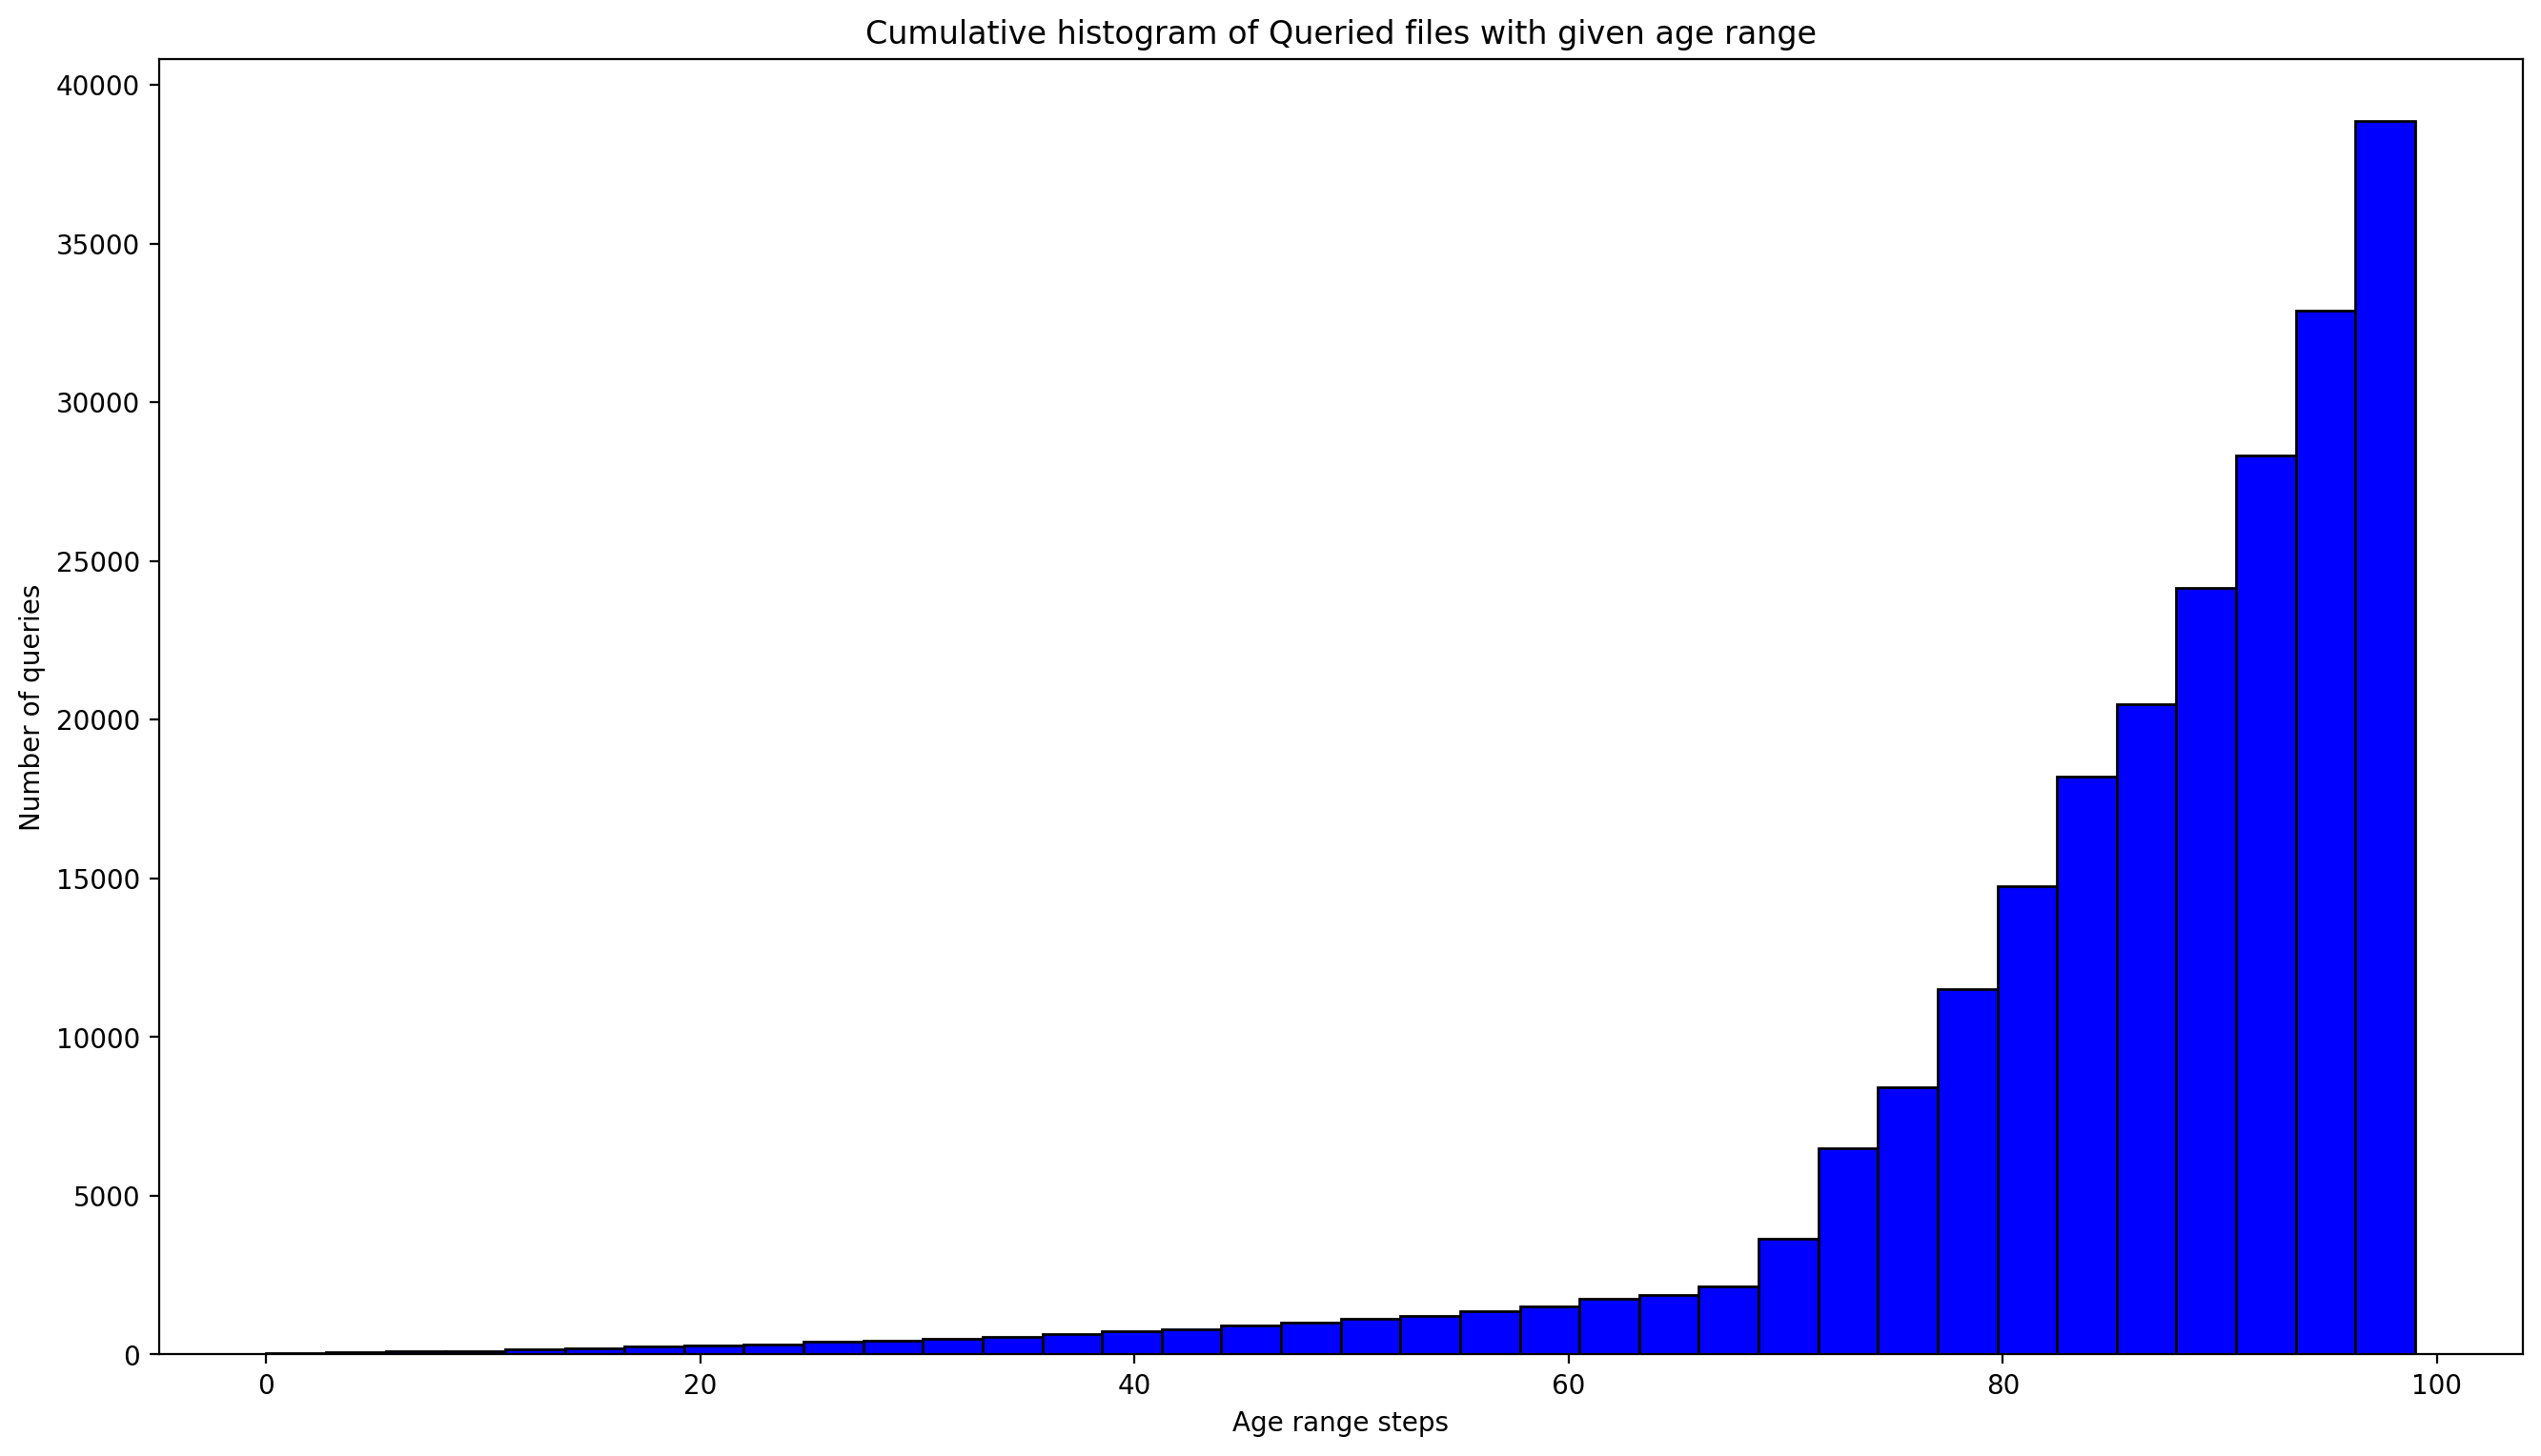

In [14]:
#kumulativni>
plt.hist(df['age_bracket'], color = 'blue', edgecolor = 'black', cumulative=True,
         bins = int(180/5))

plt.title('Cumulative histogram of Queried files with given age range')
plt.xlabel('Age range steps')
plt.ylabel('Number of queries')

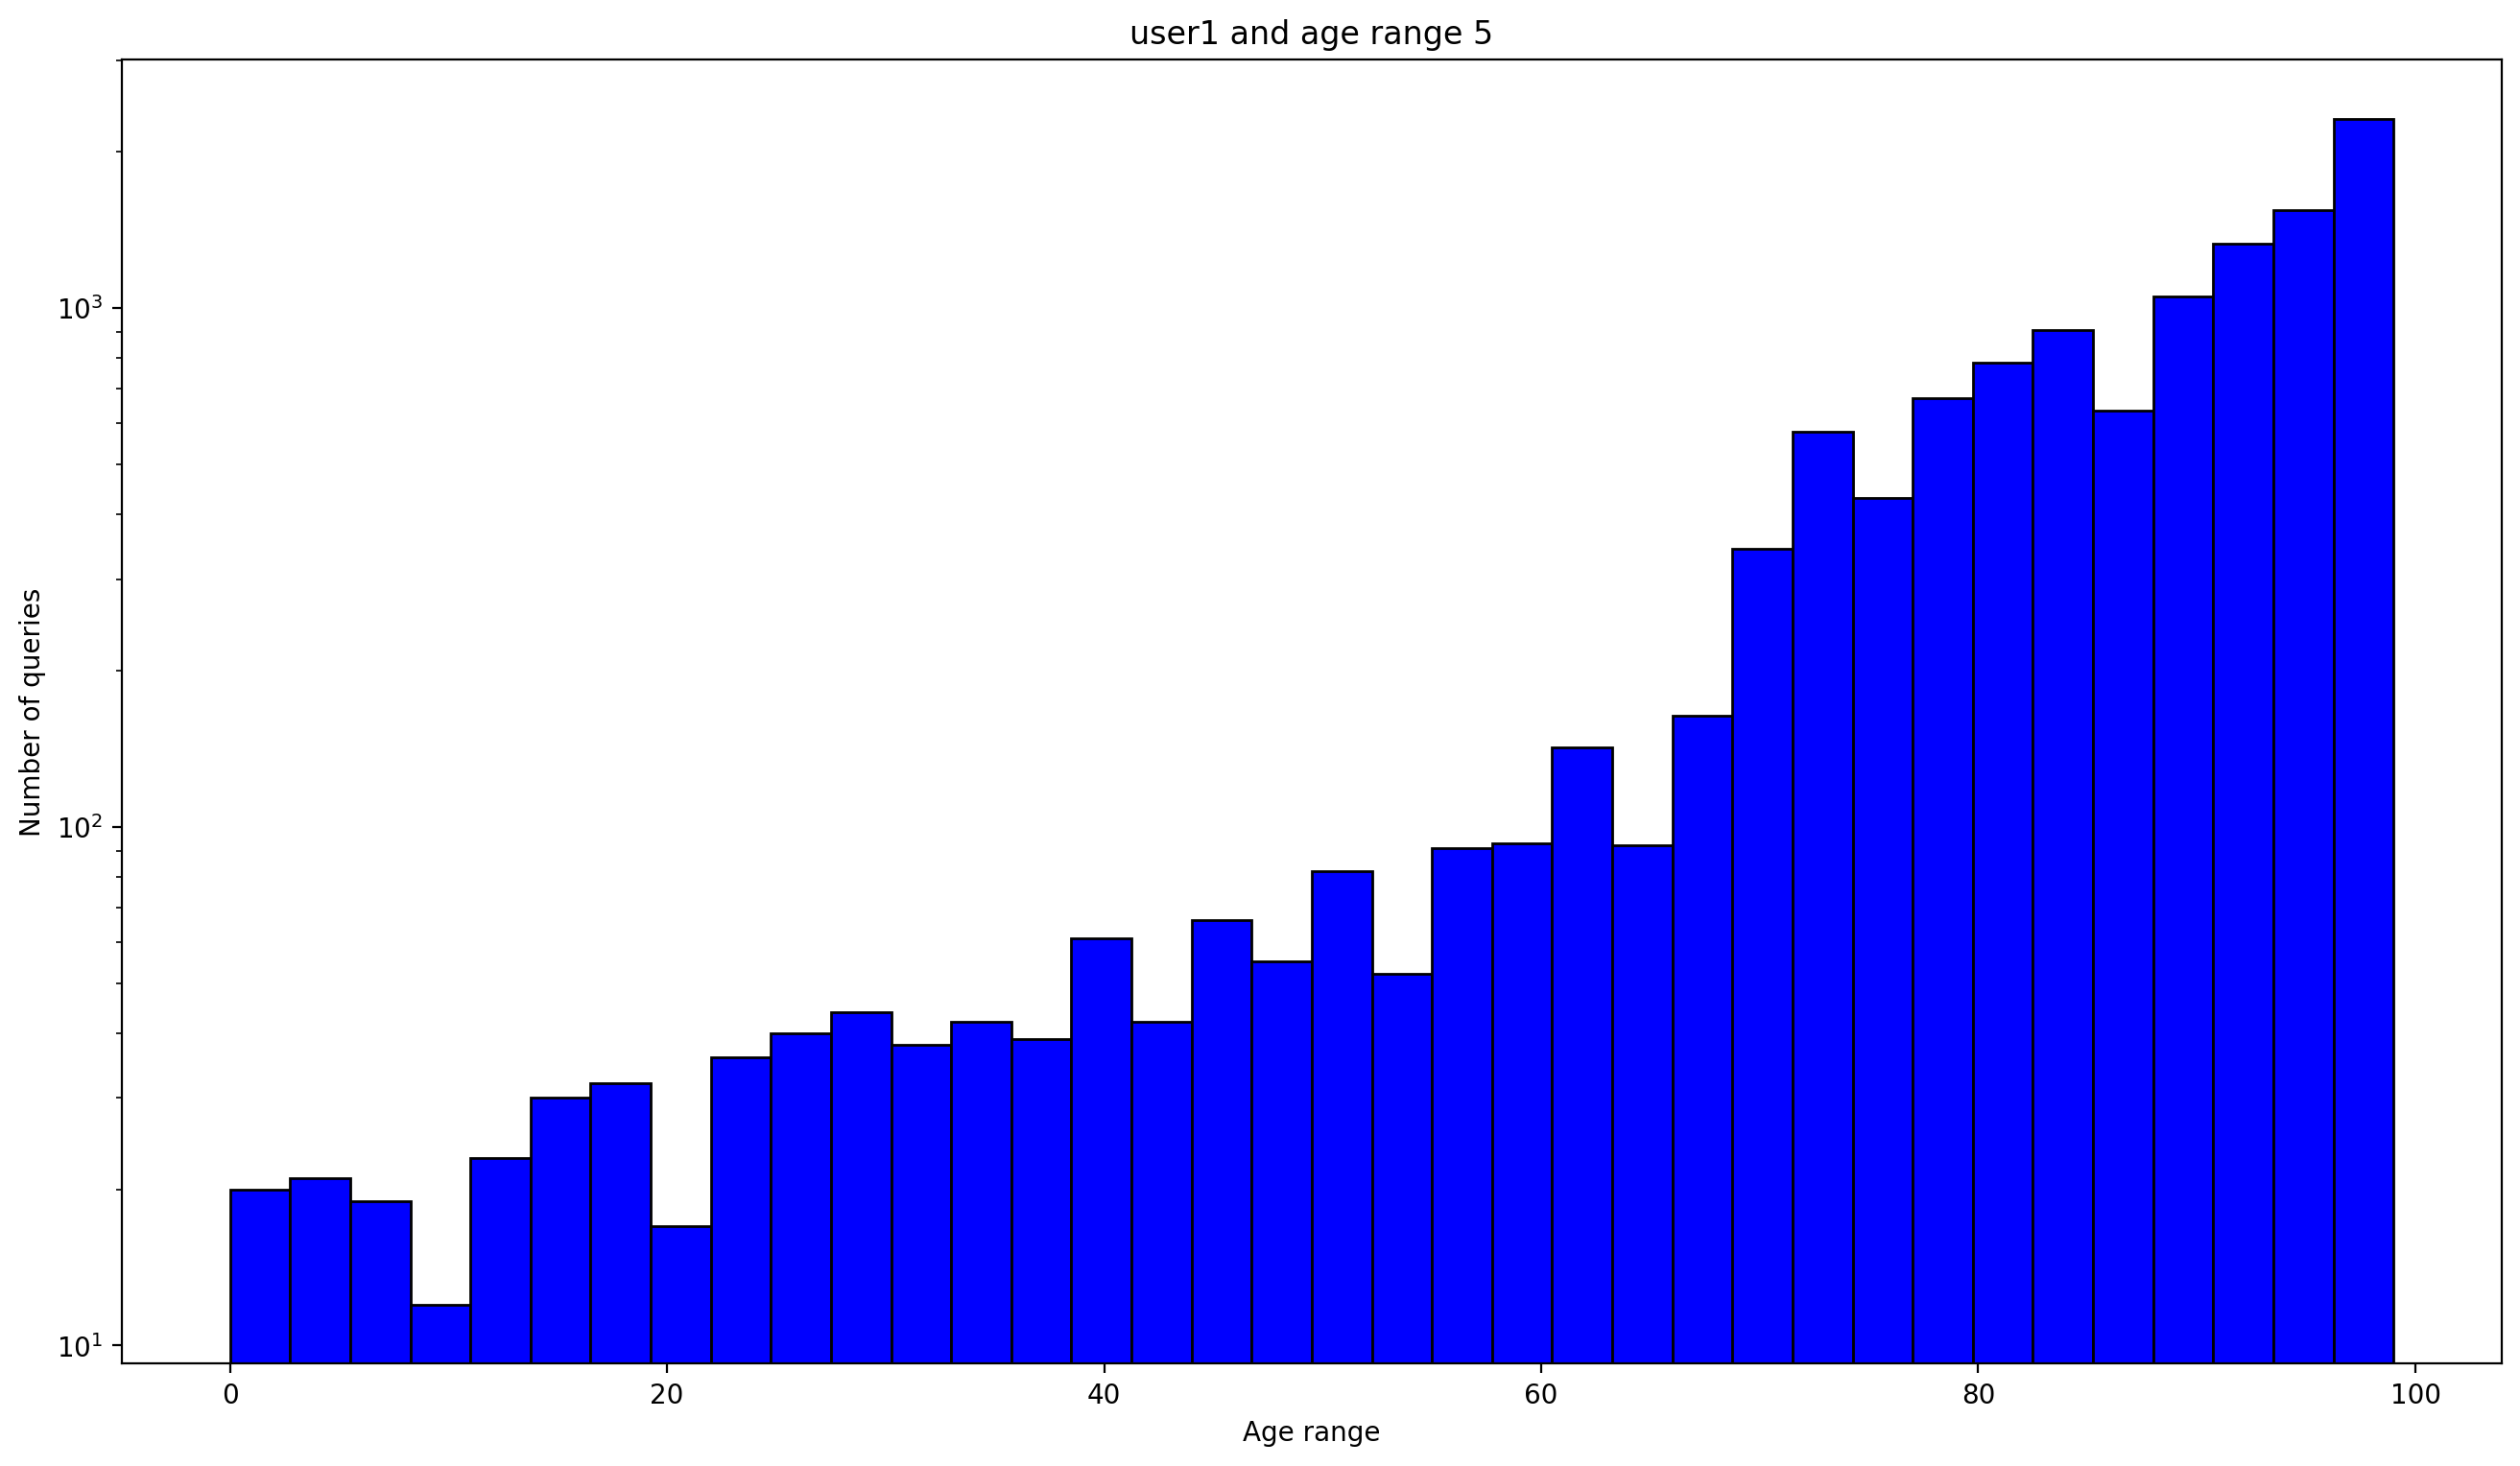

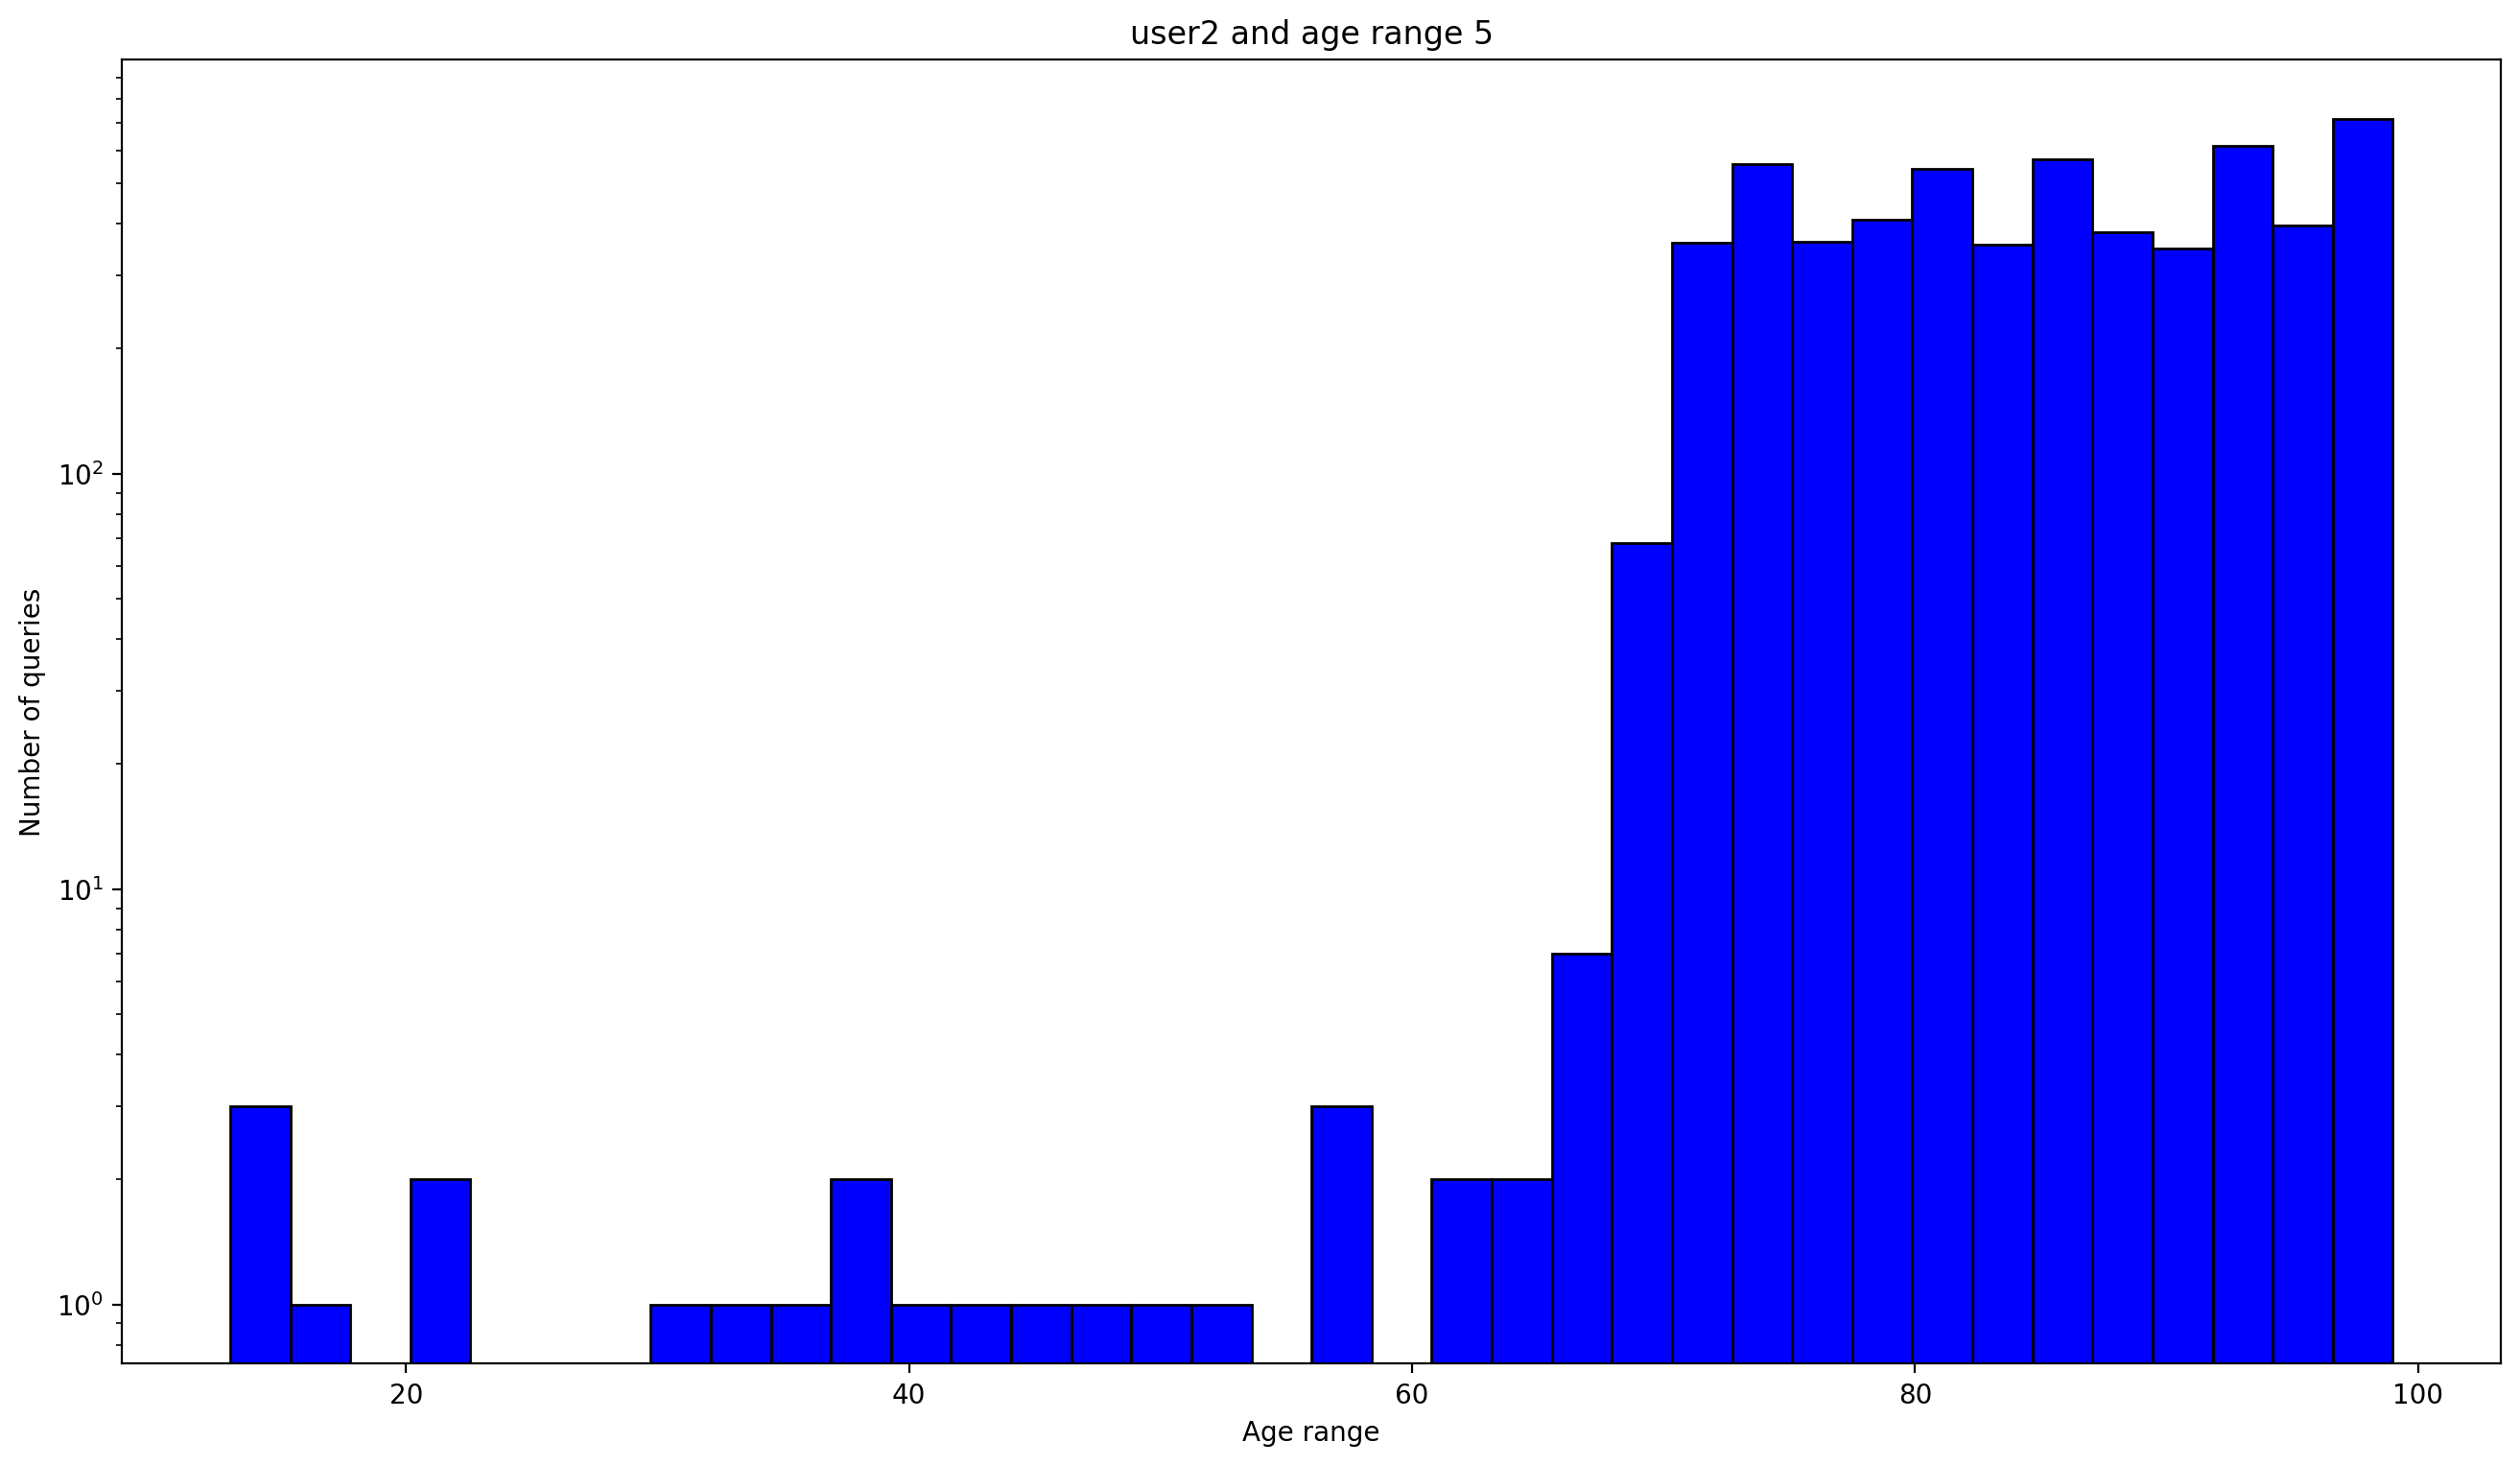

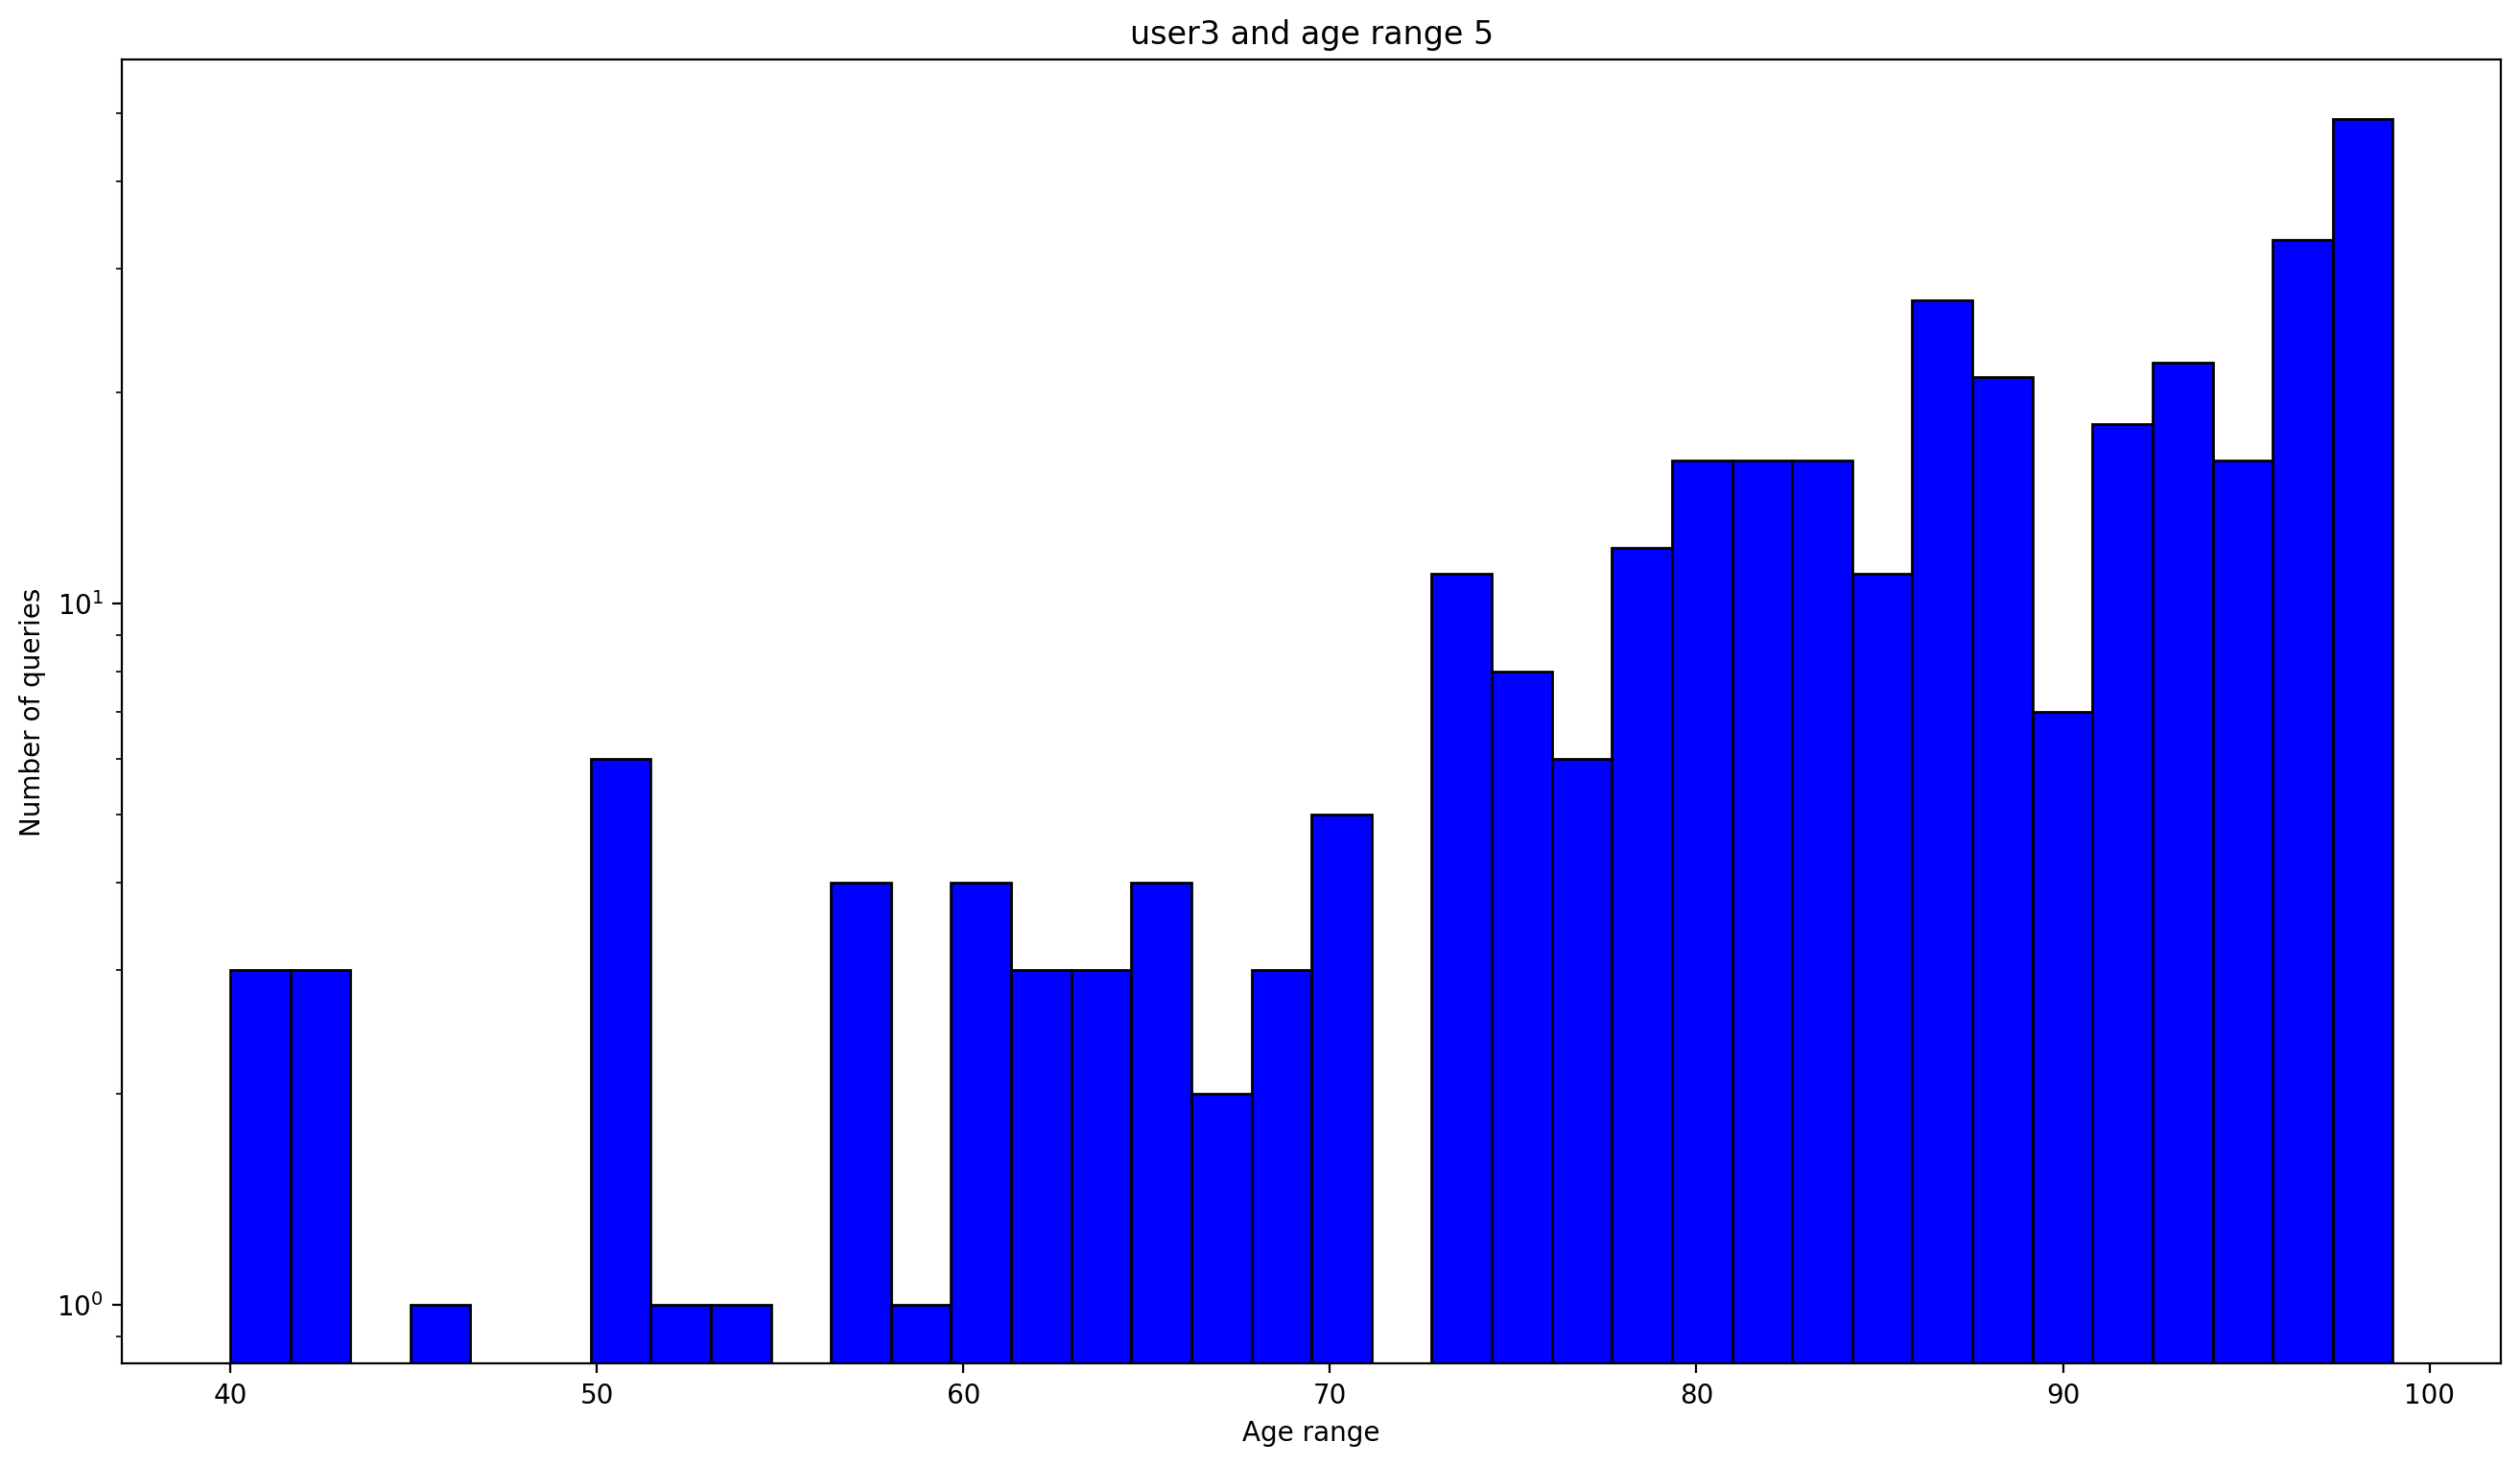

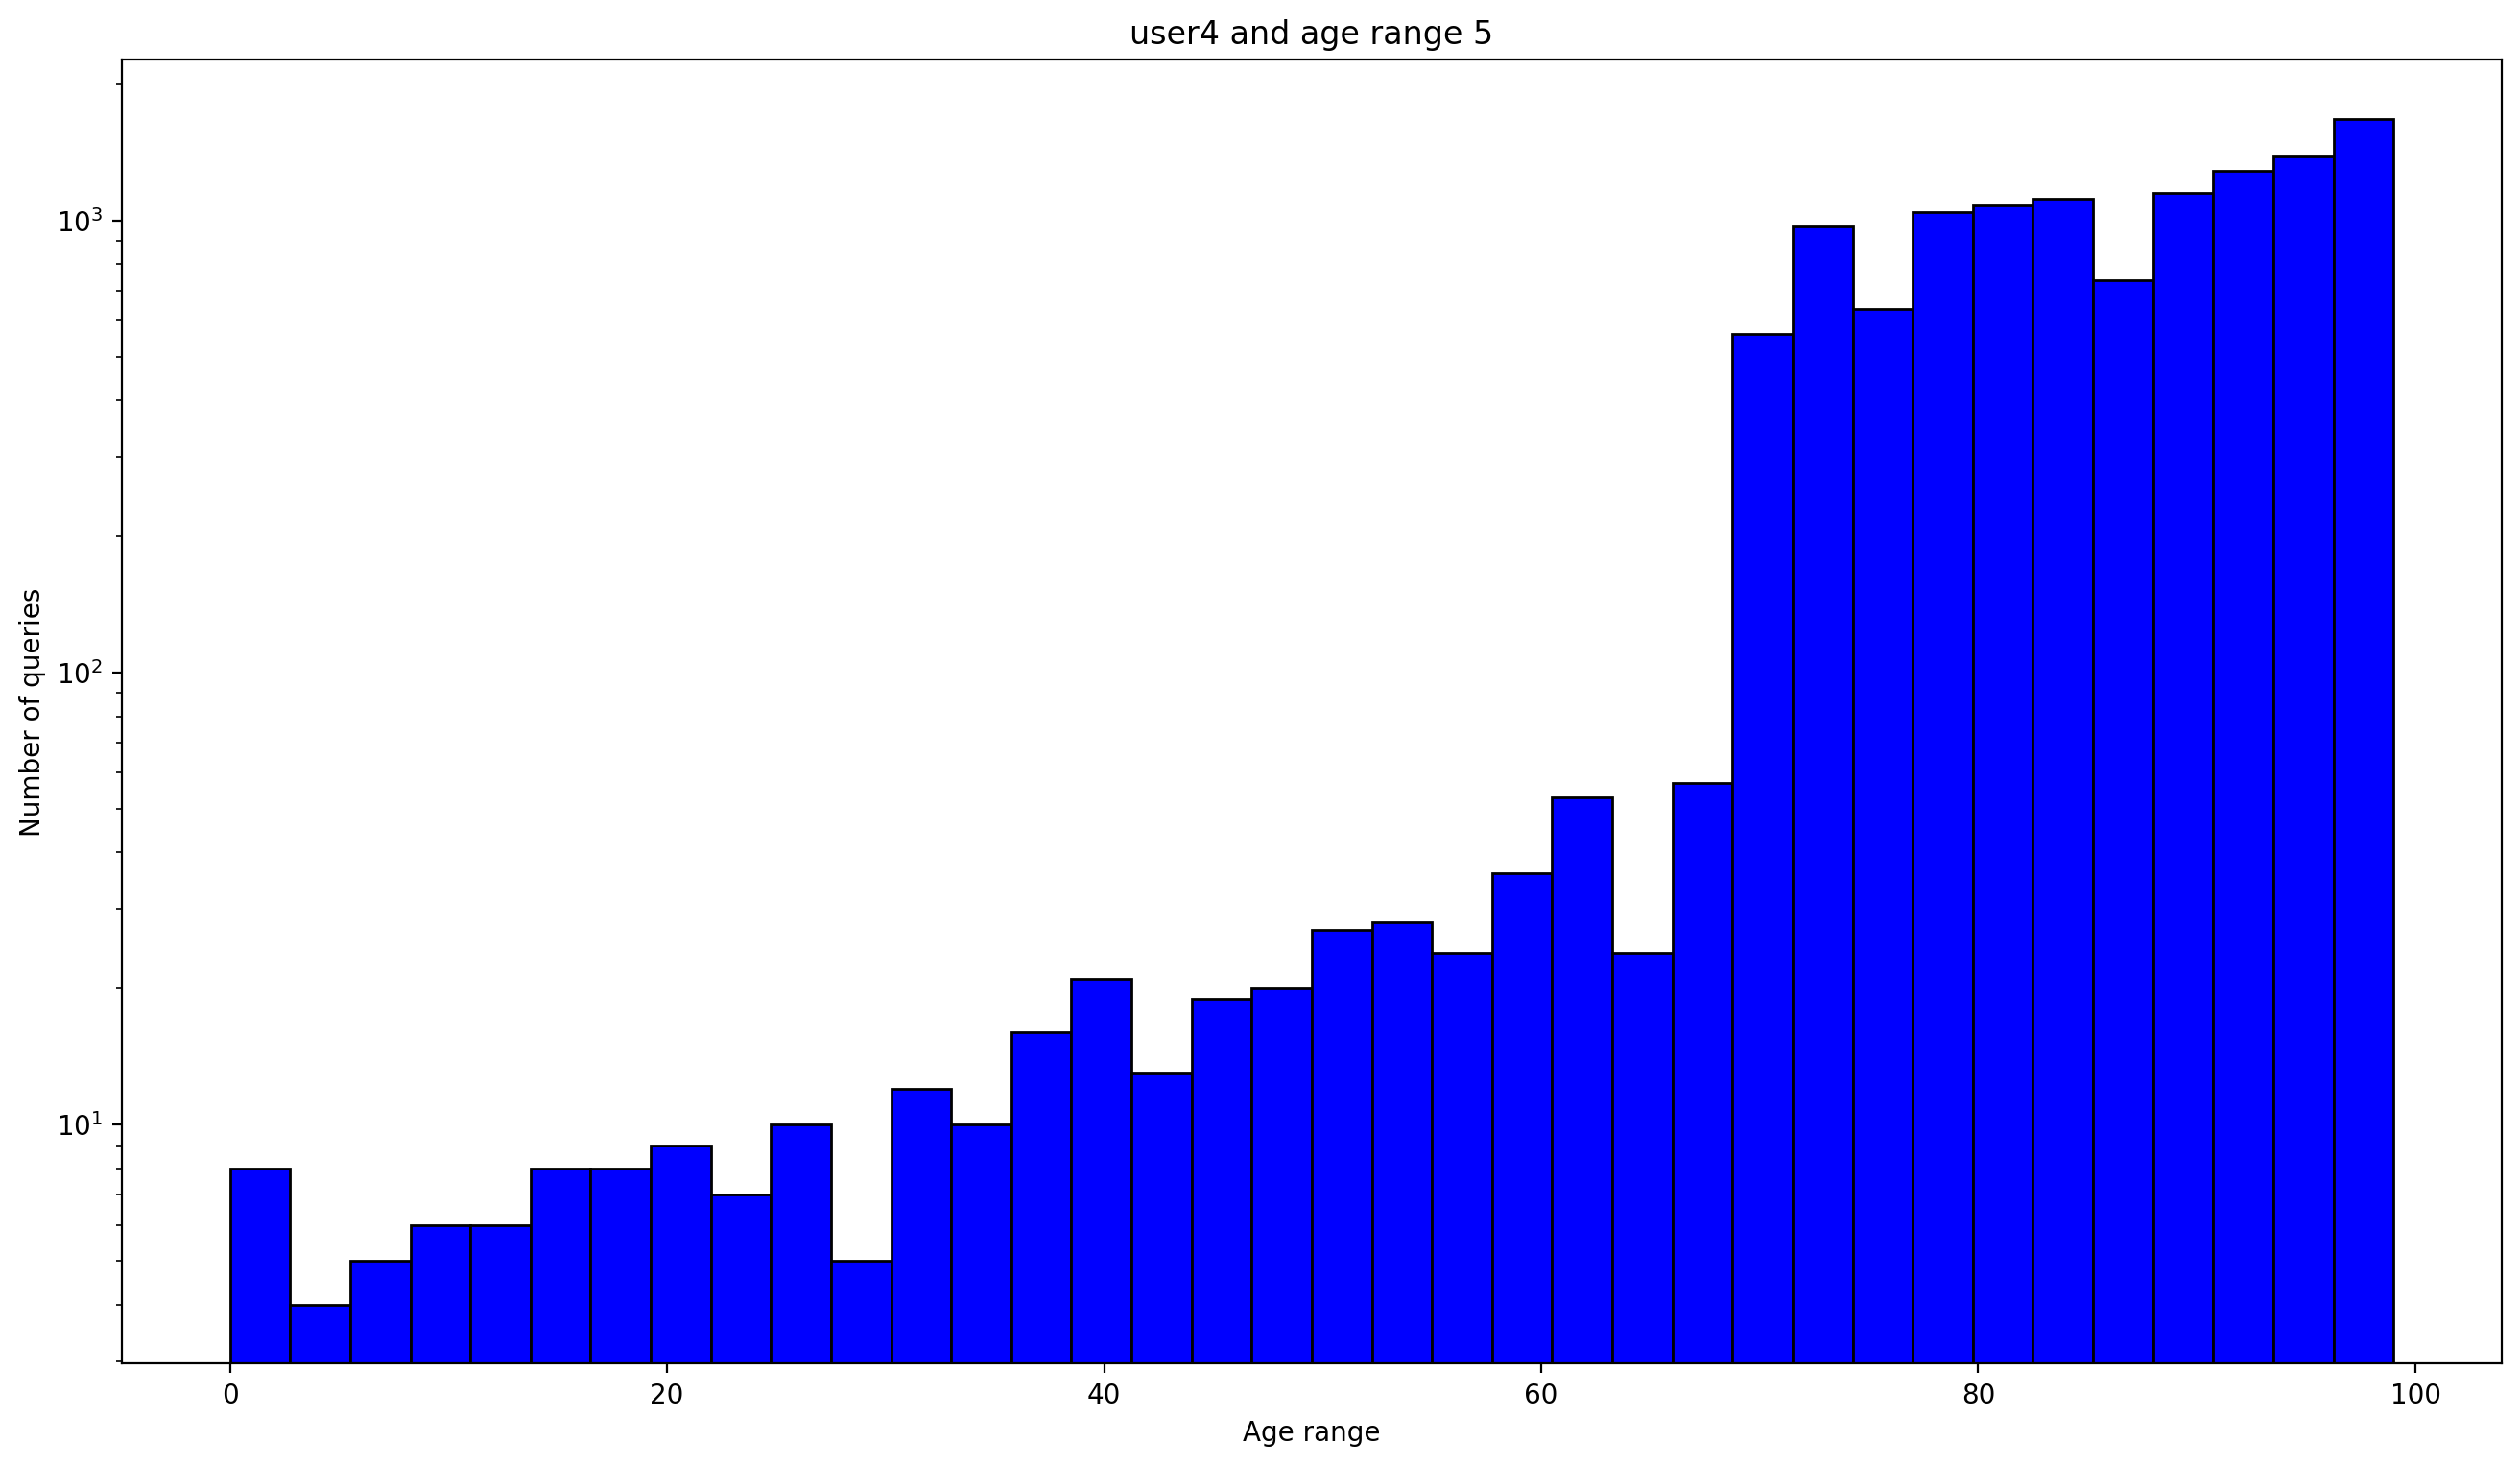

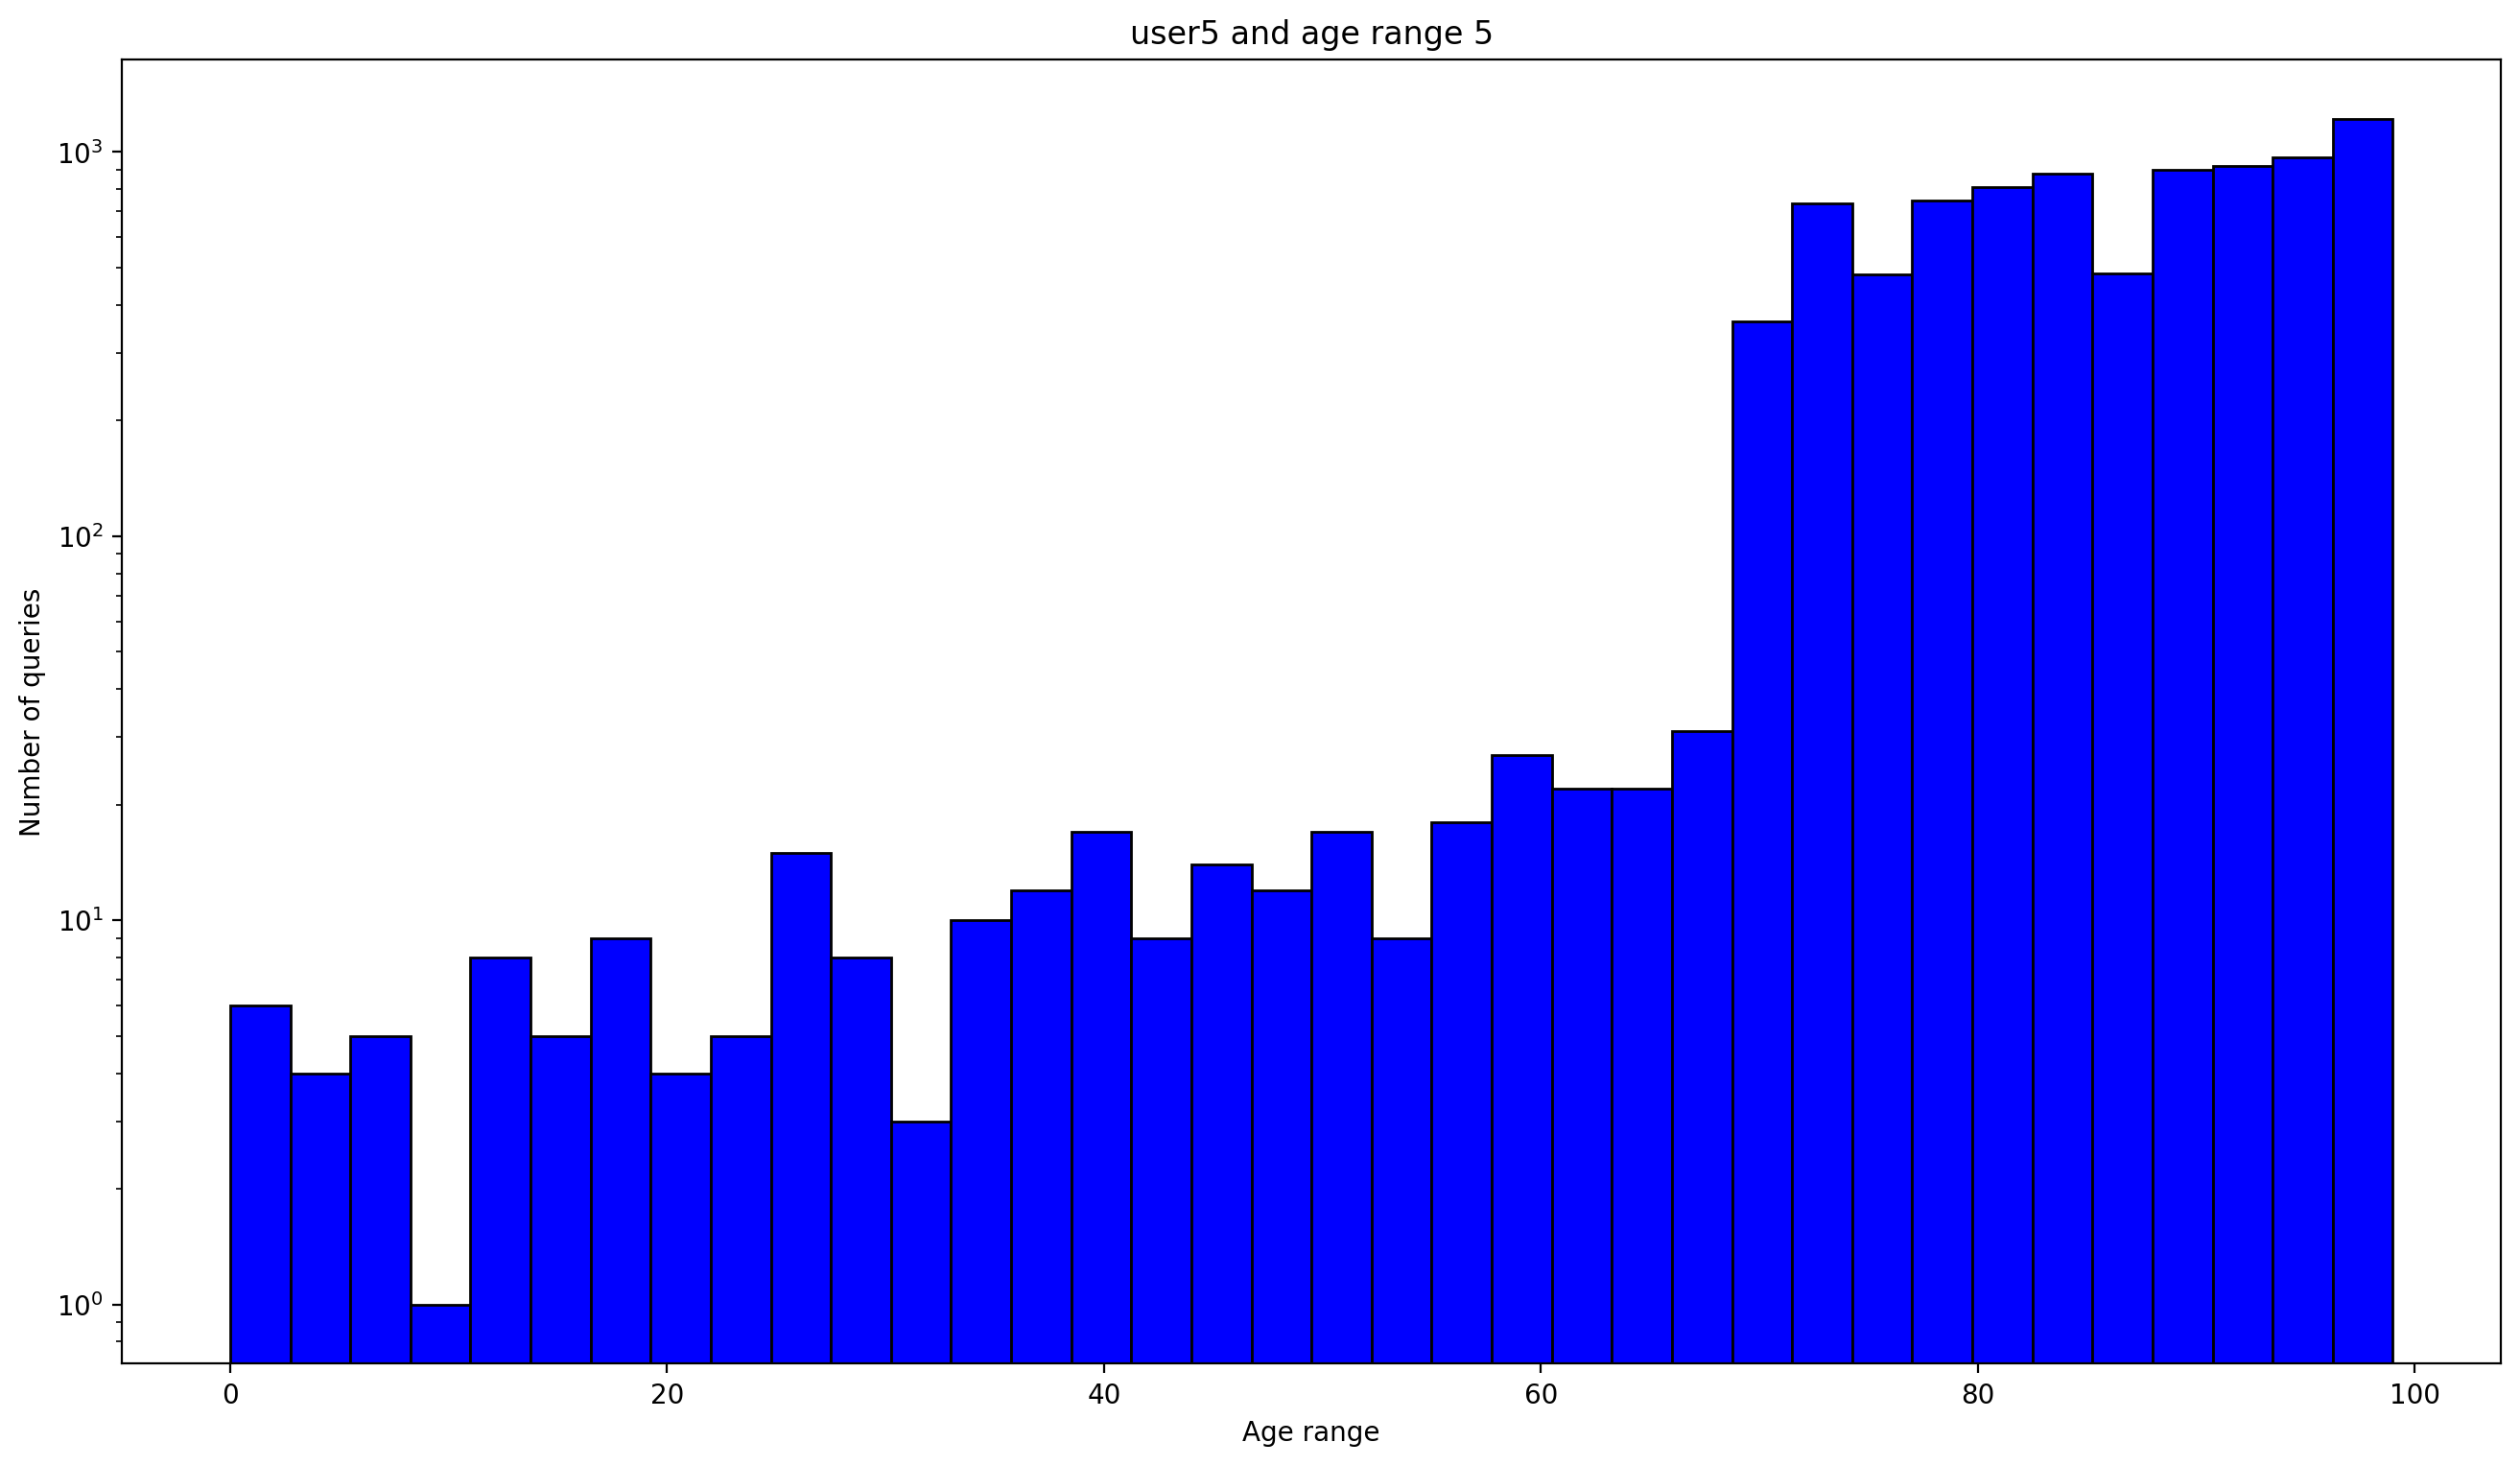

In [15]:
for user in users:
    plt.figure()
    p = df[df["User"]==user]['age_bracket']
    plt.hist(p, color = 'blue', edgecolor = 'black', bins = int(180/5), log=True)
    plt.title('{} and age range {}'.format(user, age_range))
    plt.xlabel('Age range')
    plt.ylabel('Number of queries')
plt.show()

# Task 3

In [16]:
def count_scanners_detections(df, new_column_name, add_examples=False):
    lst1_df = []
    lst2_df = []
    list_example_sha = []
    for i,j in zip(df['Detected By'].index, df['Detections'].index):
        string1 = str(df['Detected By'][i])
        string2 = str(df['Detections'][i])
        string_sha_example = str(df['File SHA1'][i])
        if string1 != "" and string2 != "":
            w_string1 = string1[1:-1].split(', ')
            w_string2 = string2[1:-1].split(', ')
            for k,g in zip(w_string1, w_string2):
                if k != "''" and g != "''" and len(k)>3 and len(g)>3:
                    lst1_df.append(k)
                    lst2_df.append(g)
                    if add_examples:
                        list_example_sha.append(string_sha_example)

    kr = pd.DataFrame()
    kr["Scanners"] = lst1_df
    kr["Detections"] = lst2_df
    if add_examples:
        kr["Example Queried File Hash"] = list_example_sha
    t = kr.groupby(['Scanners', 'Detections']).size().reset_index()
    t.rename(columns={0:new_column_name}, inplace=True)
    
    if add_examples:
        kr["Example Queried File Hash"] = list_example_sha
        t = pd.merge(t, kr, on=['Scanners','Detections'], how="inner")
        t.drop_duplicates(subset=['Scanners','Detections', new_column_name], inplace=True)
        
    t.sort_values(by=['Scanners', 'Detections'],inplace=True, ascending=False)
    
    return t




t = count_scanners_detections(df, new_column_name='Total Queried File Hash Count')

df_without_duplicates = df[["File SHA1","Detected By", "Detections"]].drop_duplicates()
t1 = count_scanners_detections(df_without_duplicates, new_column_name='Unique Queried File Hash Count', add_examples=True)

result = pd.merge(t, t1, on=['Scanners','Detections'], how="inner")

result.sort_values(by=['Total Queried File Hash Count', 'Unique Queried File Hash Count'],inplace=True, ascending=False)
result.head(20)

,Scanners,Detections,Total Queried File Hash Count,Unique Queried File Hash Count,Example Queried File Hash
295,'scanner02','Generic.Malware',25567,11774,a21636d30204b3c462ea5dea9e993aedd868d04e
147,'scanner07','PUA.Installer',5448,2502,3a2aa5bbf3bf644a71bd59792dcfdb2757ca1bc1
232,'scanner05','Generic.Malware',2259,1028,afe6ad7a5aa2db19e78b7ae0655cf7273befafe8
183,'scanner06','Generic.Malware',2184,1020,2aac2bf21810f53a57f4f653005639a047ed3391
133,'scanner08','Generic.Malware',2152,1007,dbeff3f883e7bc68e358308b14876625f4625be4
35,'scanner10','Generic.Malware',2152,1002,dbeff3f883e7bc68e358308b14876625f4625be4
331,'scanner01','Generic.Malware',2136,1003,bf92d8fcbd8a8810349e1cc6217c4ab1e8d12e29
281,'scanner03','Generic.Malware',2106,999,21fbe12a9e332bb1dccd96308bda3db72166d53b
84,'scanner09','Generic.Malware',2085,984,2aac2bf21810f53a57f4f653005639a047ed3391
311,'scanner01','Trojan.Pajetbin',113,46,642acf26662e5f1435abb0cd23f4e57efcb1d1dd


# Task 4

In [17]:
#4 zadatak:
#Detection Percentage

for user in users:
    maxi = df['Detection Percentage'][df["User"] == user].max()
    mini = df['Detection Percentage'][df["User"] == user].min()
    avgi = df['Detection Percentage'][df["User"] == user].mean()
    mediani = df['Detection Percentage'][df["User"] == user].median()
    print("User is {}| max={:.3f}| min={:.3f}| mean={:.3f}| median={:.3f}".format(user, maxi, mini, avgi, mediani))
    print()

User is user1| max=1.000| min=0.000| mean=0.271| median=0.111

User is user2| max=0.900| min=0.000| mean=0.249| median=0.111

User is user3| max=0.800| min=0.100| mean=0.194| median=0.200

User is user4| max=1.000| min=0.000| mean=0.275| median=0.125

User is user5| max=1.000| min=0.000| mean=0.268| median=0.111



In [18]:
for user in users:    
    d = df['Detection Percentage'][df["User"] == user].describe()
    print("Details for user", user)
    print(d)
    print()

Details for user user1
count    9150.000000
mean        0.270677
std         0.260669
min         0.000000
25%         0.100000
50%         0.111111
75%         0.300000
max         1.000000
Name: Detection Percentage, dtype: float64

Details for user user2
count    1121.000000
mean        0.248734
std         0.243715
min         0.000000
25%         0.100000
50%         0.111111
75%         0.222222
max         0.900000
Name: Detection Percentage, dtype: float64

Details for user user3
count    251.000000
mean       0.193670
std        0.138099
min        0.100000
25%        0.100000
50%        0.200000
75%        0.200000
max        0.800000
Name: Detection Percentage, dtype: float64

Details for user user4
count    8847.000000
mean        0.274683
std         0.264620
min         0.000000
25%         0.100000
50%         0.125000
75%         0.300000
max         1.000000
Name: Detection Percentage, dtype: float64

Details for user user5
count    6446.000000
mean        0.267537
std

# Conclusion

#### Can you compare usage between users, do you notice something particular?
We can notice that the service is growing with every user, with more queries in the later period. Some like user1 and user3 use it steadily, others like user2 and user4, use it rapidly in recent times. User5 is somewhere between these two groups.

#### Can you tell what kind of files each user is interested in?
Based only on hash files, no.

#### Based only on the available file info for the queried files, which user may be most satisfied with our services and why? Which user may be dissatisfied?
User2 has had the most rapid growth lately. Given that, the most satisfied is probably the User1 who uses it steadily all the time, for the longest period.
Other than that, as we look at mean and median of Detection Percentage we could say it is user4. 

#### What can you tell us about the scanner detections?
Every scanner is best at catching 'Generic.Malware', with scanner02 being best by order of magnitude, while scanner07 is by far the best in PUA.Installer.